In [23]:
# Import the pandas library as pd
import pandas as pd

# Read the CSV file into a DataFrame named df
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Set pandas option to display all columns of the DataFrame
pd.set_option("display.max_columns", None)

# Output the DataFrame df on a single line
print(df.to_string(index=False))


 Age Attrition    BusinessTravel  DailyRate             Department  DistanceFromHome  Education   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel                   JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
  41       Yes     Travel_Rarely       1102                  Sales                 1          2    Life Sciences              1               1                        2 Female          94               3         2           Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80             

**1. DATA EXPLORATION**

In [24]:

# Display the first few rows of the DataFrame
print(df.head())

# Display summary statistics for numerical columns
print(df.describe())

# Display summary statistics for categorical columns
print(df.describe(include=['O']))

# Display information about the DataFrame including data types and non-null counts
print(df.info())

# Display the shape of the DataFrame
print(df.shape)

# Select numerical columns of type integer
numerical_features = df.select_dtypes('int64').columns


# Display the names of the numerical columns
print(numerical_features)

# Check for missing values in the DataFrame
print(df.isnull().sum())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  

**2. DATA CLEANING**

In [81]:
# Handle missing values (example: fill missing values with the median of the column)
df = df.fillna(df.median(numeric_only=True))

# Correct data types if necessary (example: converting a column to categorical type)
df['Attrition'] = df['Attrition'].astype('category')

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for and remove any outliers if necessary (example: using z-score or IQR)
# Here we use IQR to remove outliers for a numerical column 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

# Select numerical columns
numerical_features = df.select_dtypes('int').columns

# Print numerical features in a single line
print(", ".join(numerical_features))

# Display the cleaned DataFrame
print(df.head().to_string(index=False, line_width=1000))


Age, DailyRate, Education, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
 Age Attrition    BusinessTravel  DailyRate             Department  Education EducationField  EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel               JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
  41       Yes     Travel_Rarely       1102                  Sales          2  Life Sciences 

In [80]:
# Read the CSV file into a DataFrame named df
file_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    df = None
except pd.errors.EmptyDataError:
    print(f"Error: File '{file_path}' is empty.")
    df = None

if df is not None:
    # Define the columns to drop
    columns_to_drop = ["DistanceFromHome", "EmployeeCount", "Over18", "StandardHours"]

    # Check if the columns exist in the DataFrame and drop them if they do
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    if columns_to_drop:
        df.drop(columns_to_drop, axis=1, inplace=True)

    # Display the first few rows of the DataFrame after dropping the columns
print(df.head().to_string(index=False, line_width=1000))
print(df.info())

 Age Attrition    BusinessTravel  DailyRate             Department  Education EducationField  EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel               JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
  41       Yes     Travel_Rarely       1102                  Sales          2  Life Sciences               1                        2 Female          94               3         2       Sales Executive                4        Single           5993        19479                   8      Yes                 11                  3                         1                 0                  8                      0                1               6                   4                      

**3.DATA ENCODING**

In [71]:

from sklearn.preprocessing import OneHotEncoder

# Define the columns to be one-hot encoded
categorical_columns = df.select_dtypes(include=['object']).columns


# Create an instance of OneHotEncoder
Ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# Fit and transform the specified columns
Ohe_transform = Ohe.fit_transform(df[categorical_columns])

# Combine the one-hot encoded columns back to the original dataframe
df = pd.concat([df.drop(categorical_columns, axis=1), Ohe_transform], axis=1)

# Display the DataFrame after one-hot encoding
print(df.head().to_string(index=False, line_width=1000))


 Age  DailyRate  Education  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Attrition_No  Attrition_Yes  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  EducationField_Human Resources  EducationField_Life Sciences  EducationField_Marketing  EducationField_Medical  EducationField_Other  EducationField_Technical Degree  Gender_Female  Gender_Male  JobRole_Healthcare Representative  JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager  JobRole_Manufacturing Director  JobRole_Research Director  JobRole_Research Scientist  \
  41       

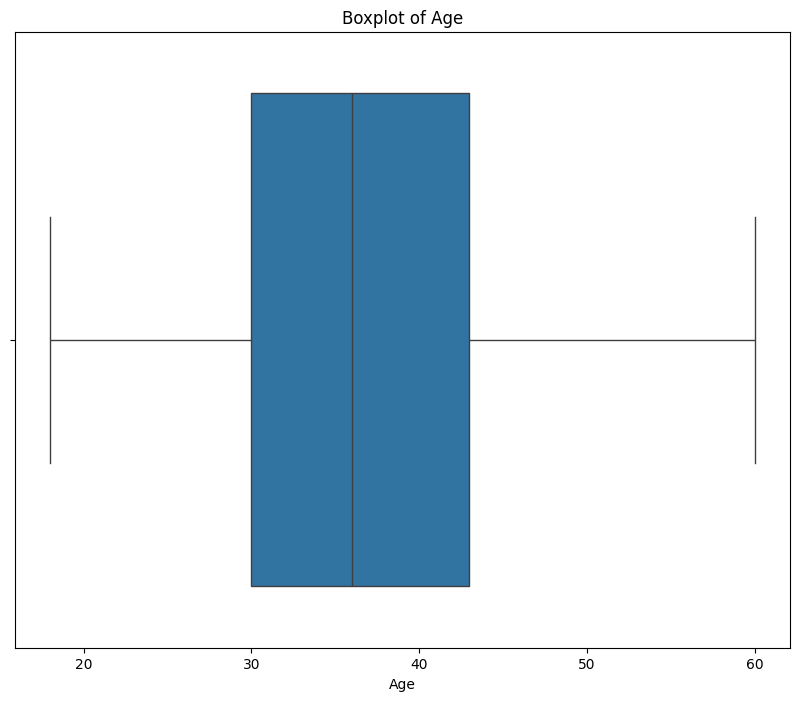

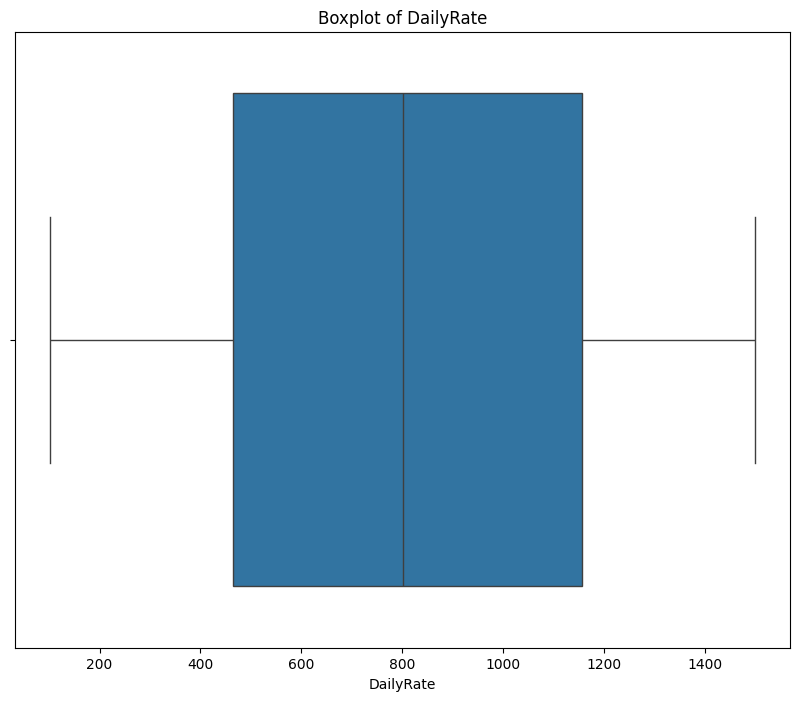

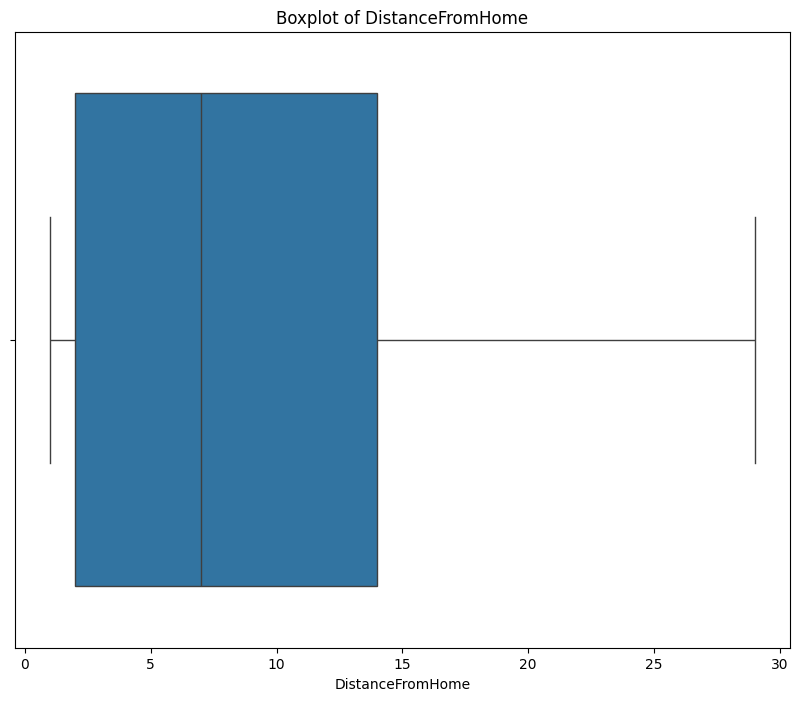

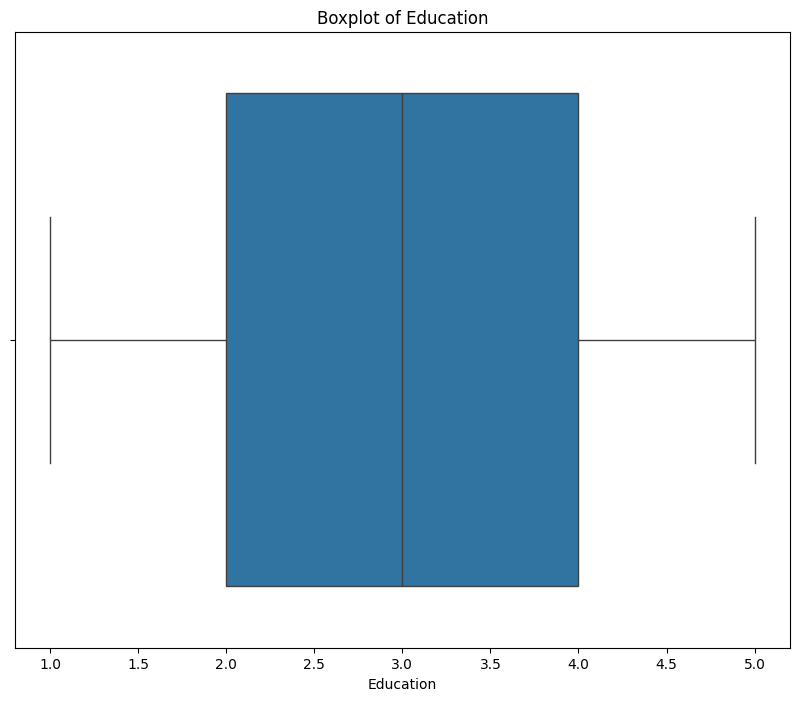

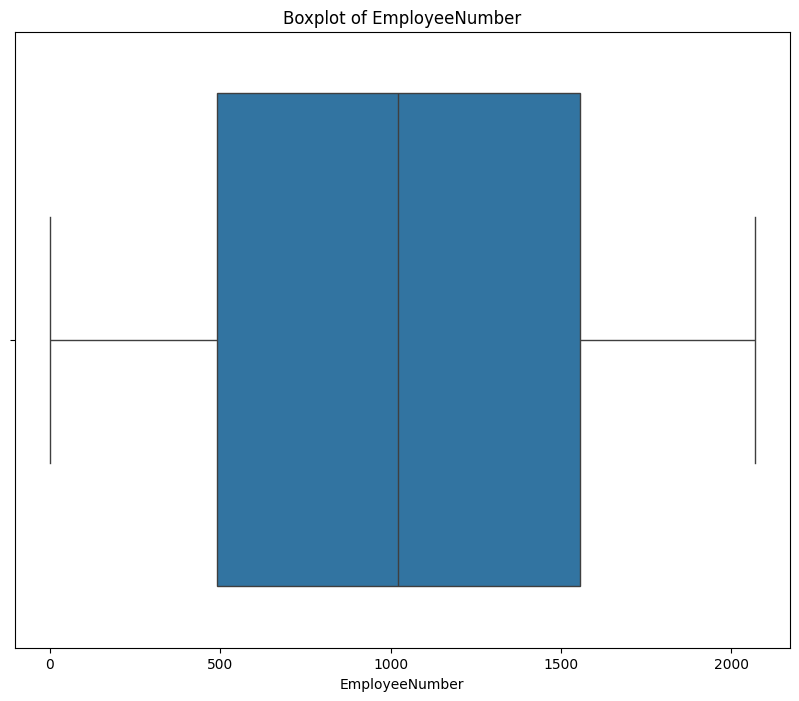

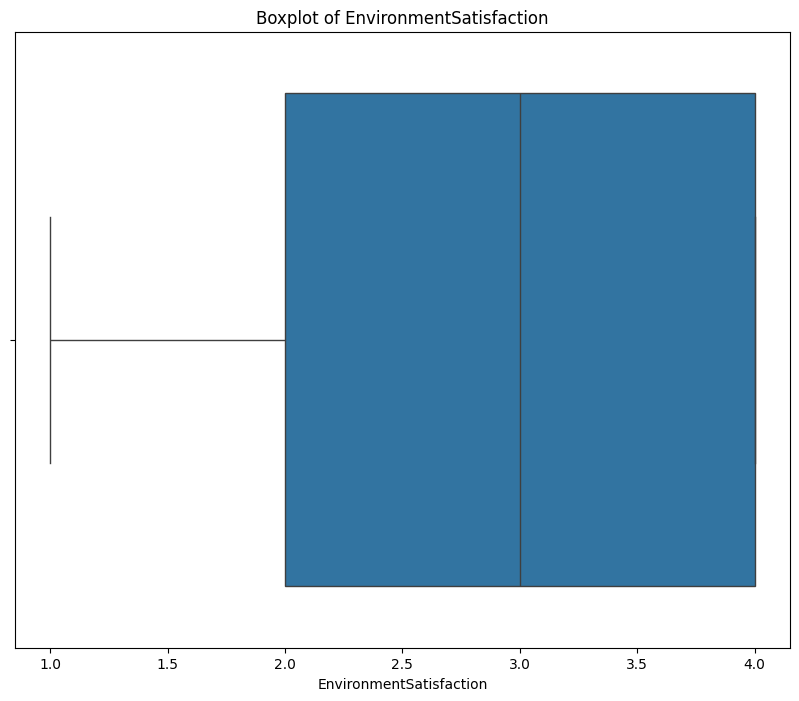

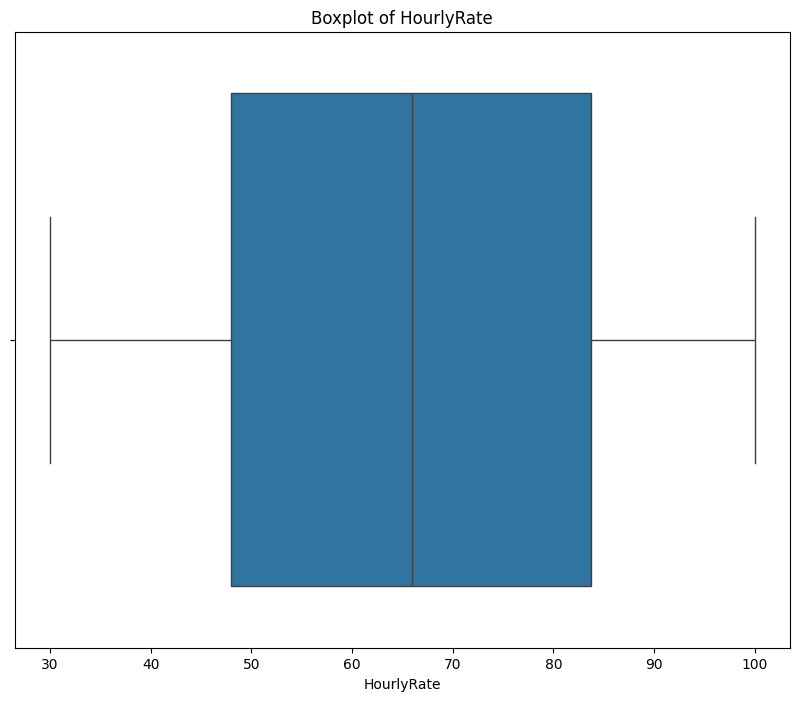

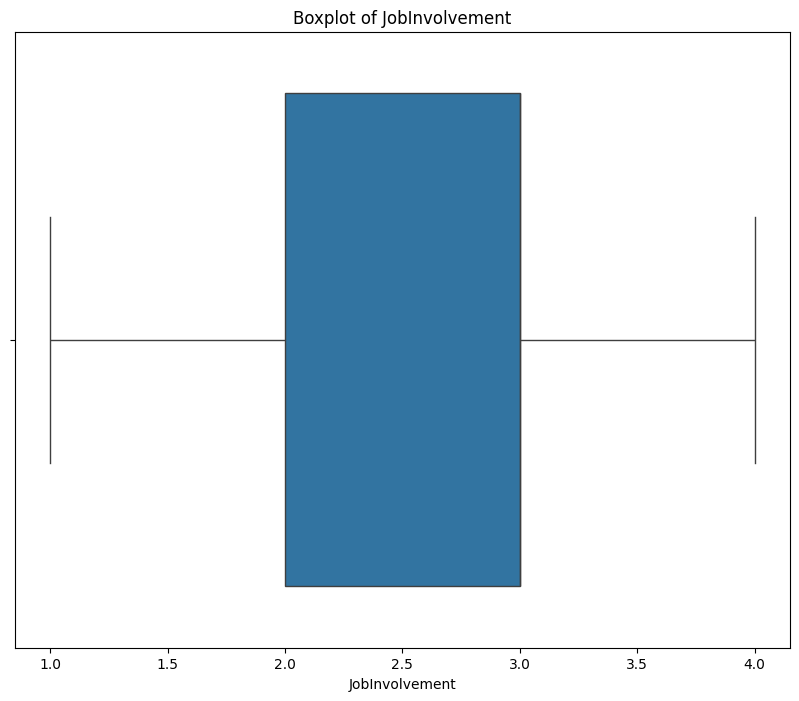

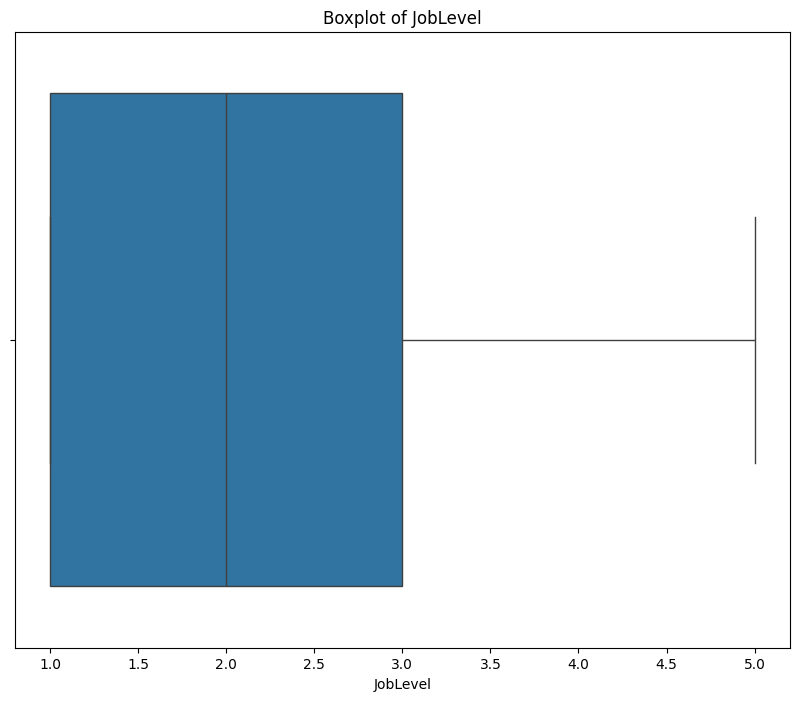

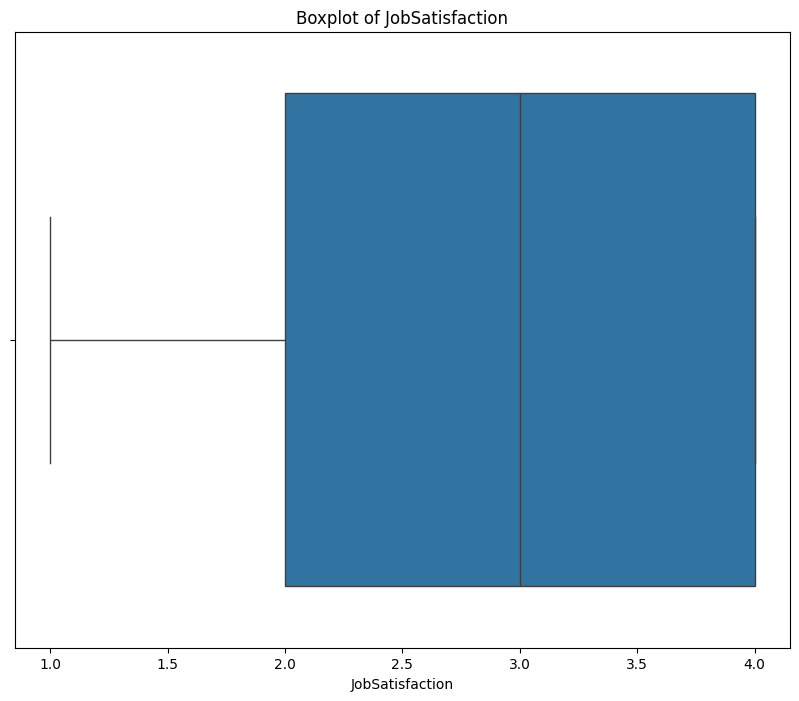

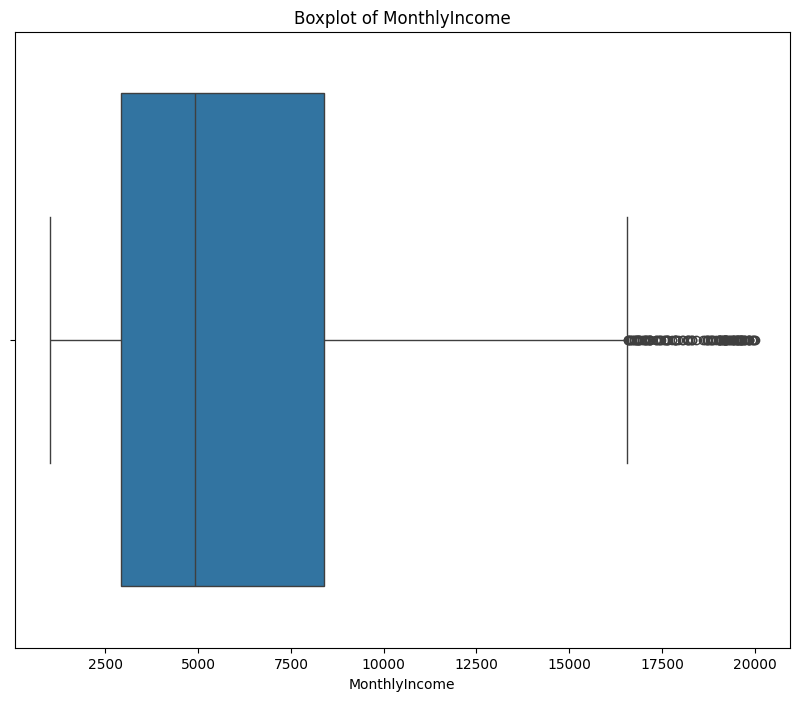

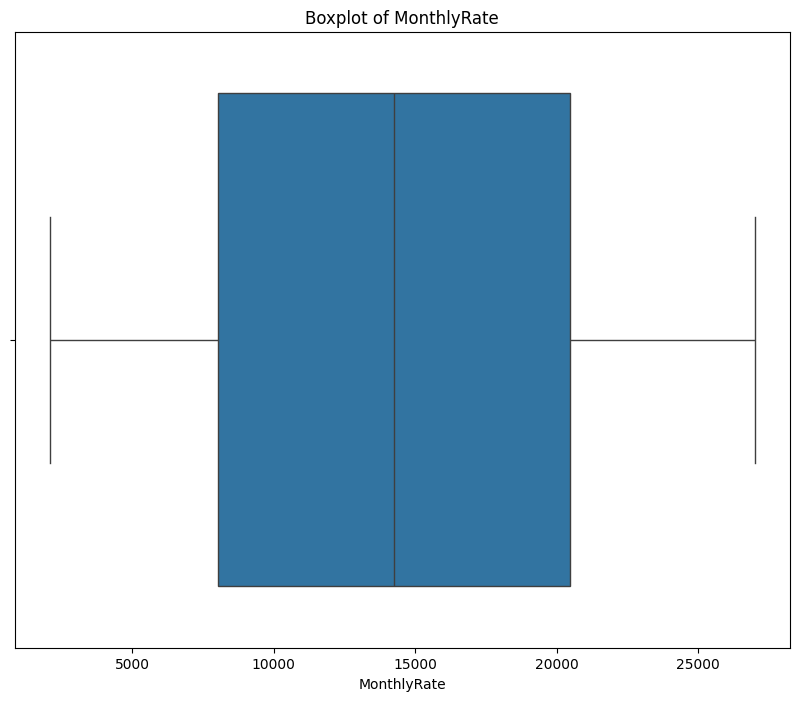

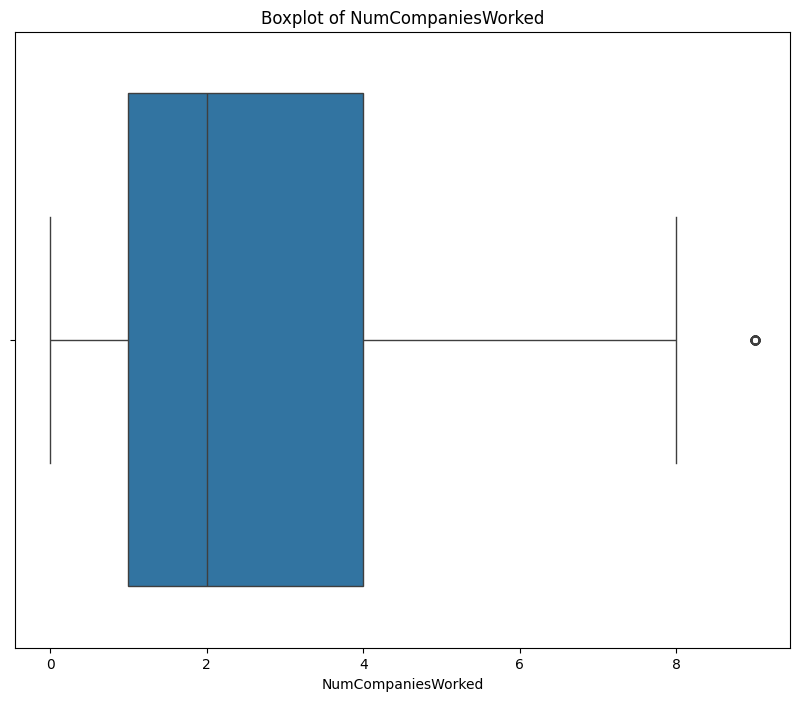

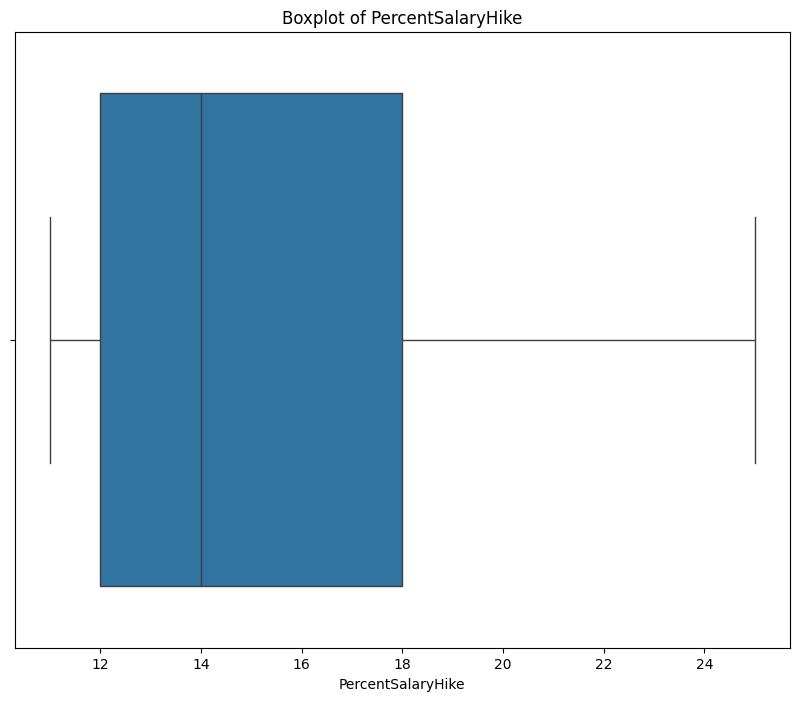

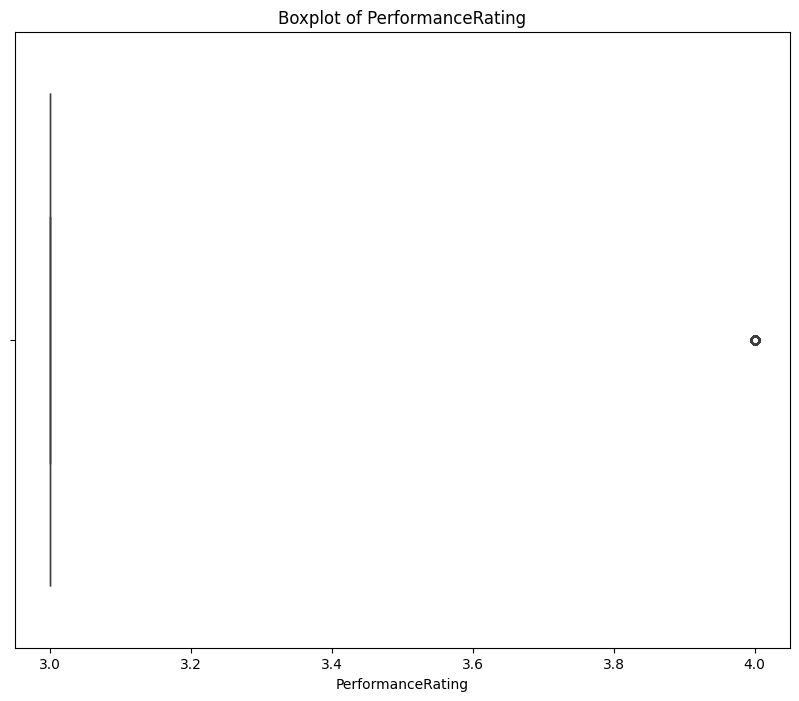

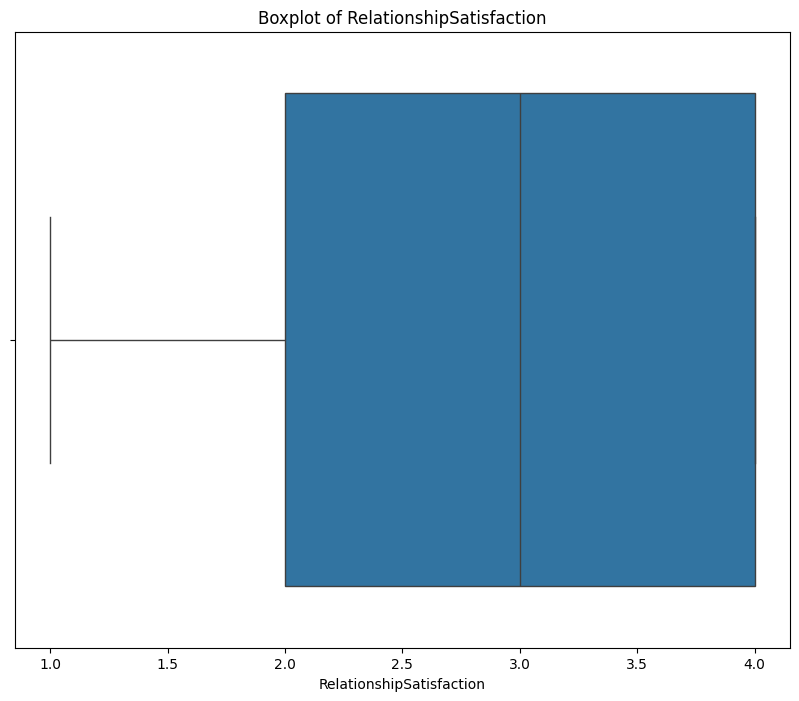

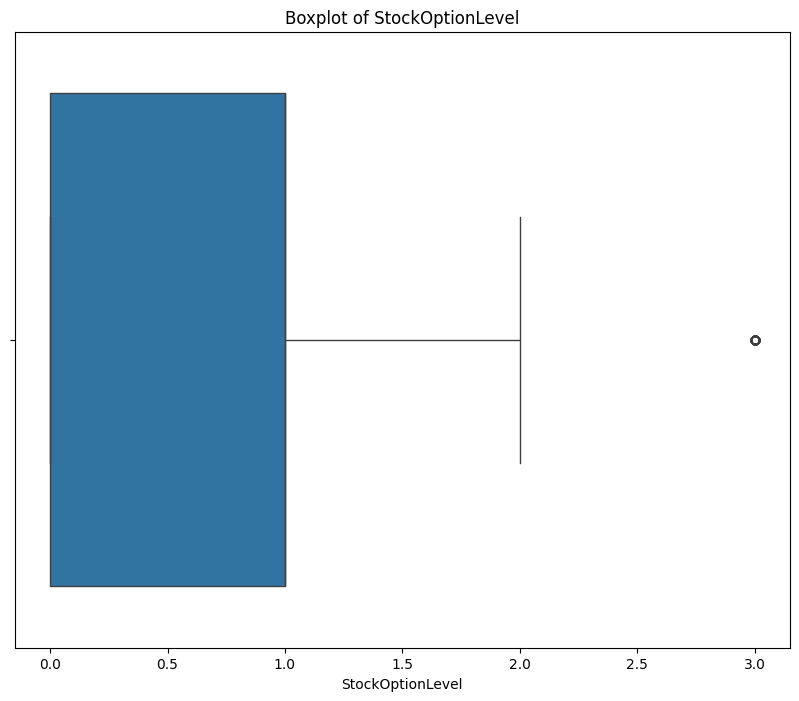

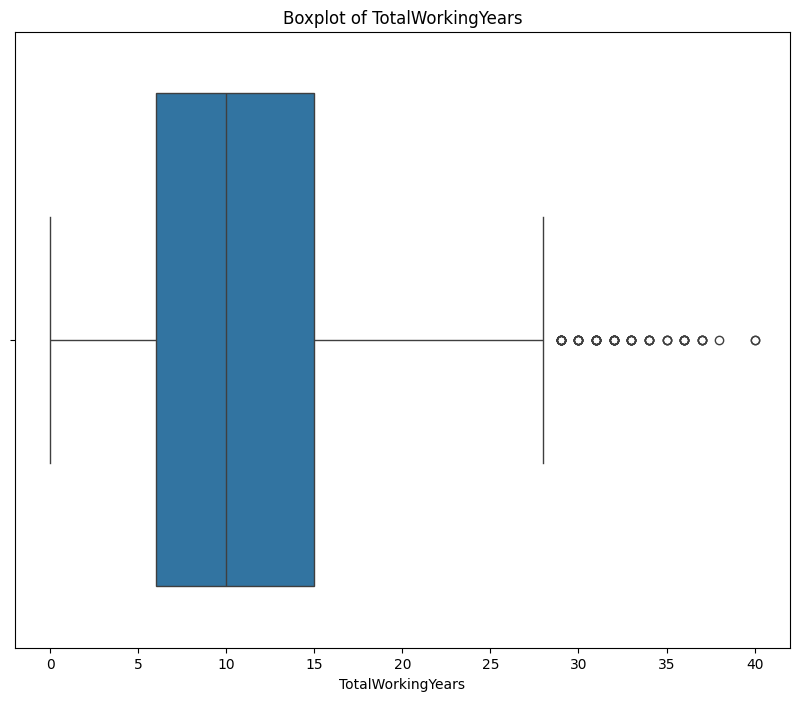

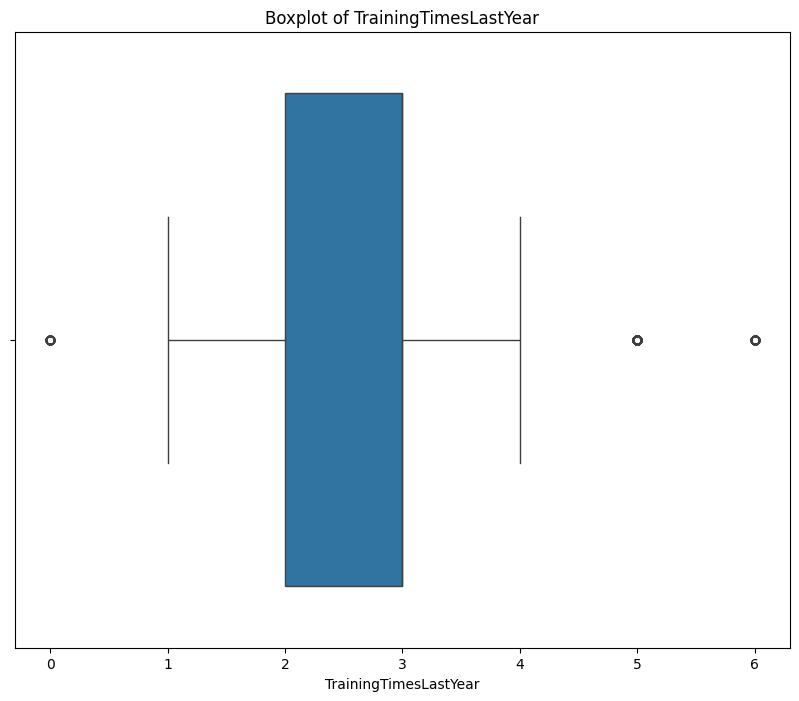

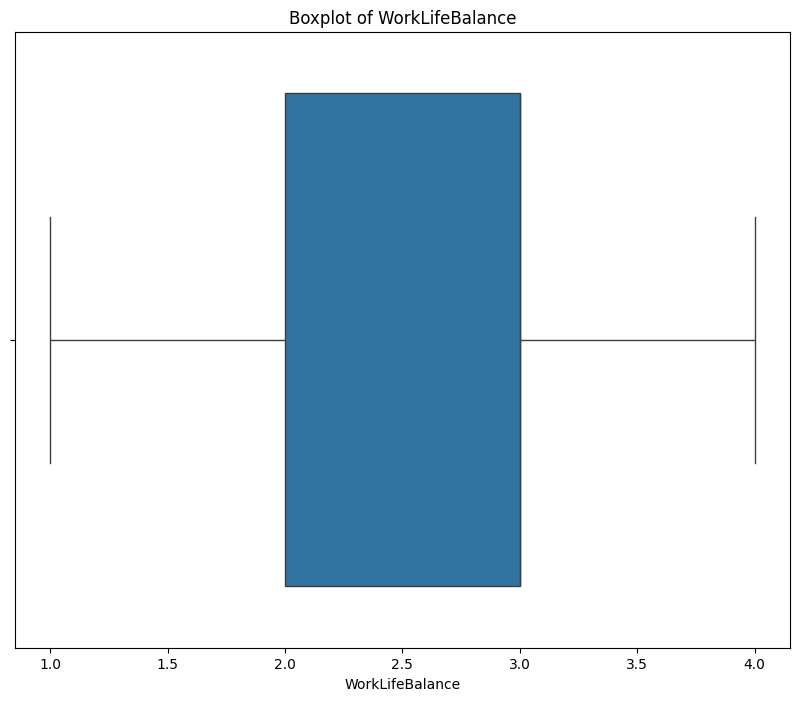

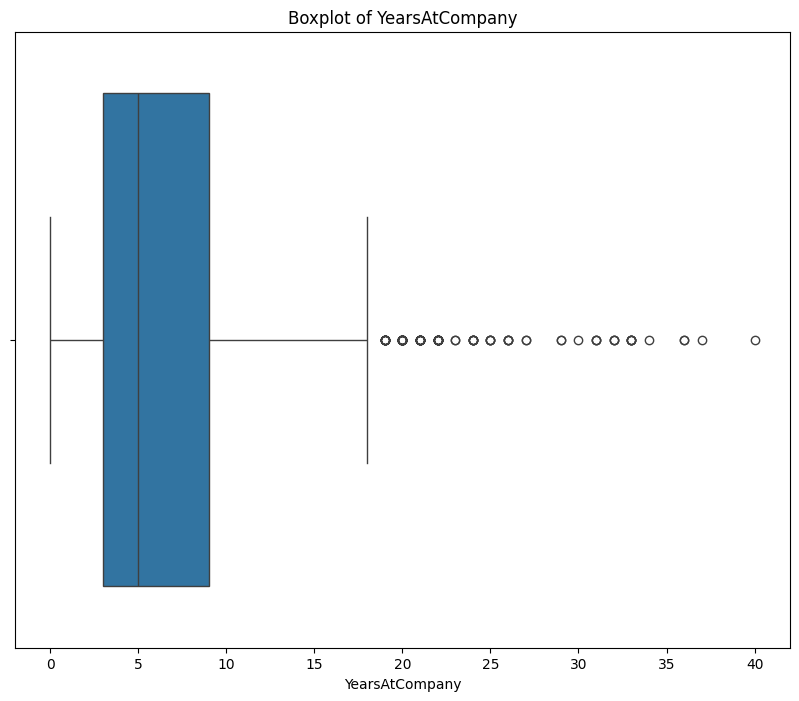

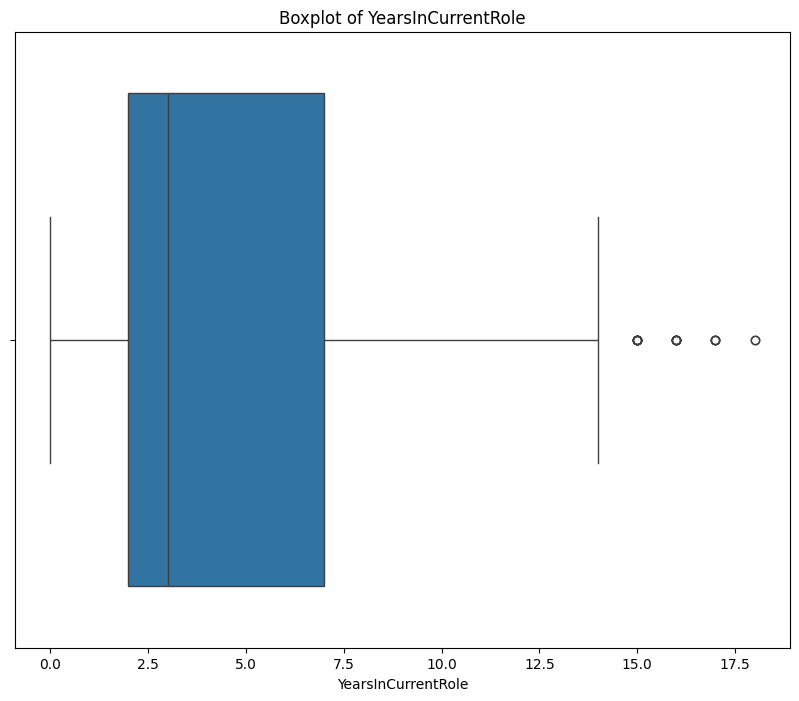

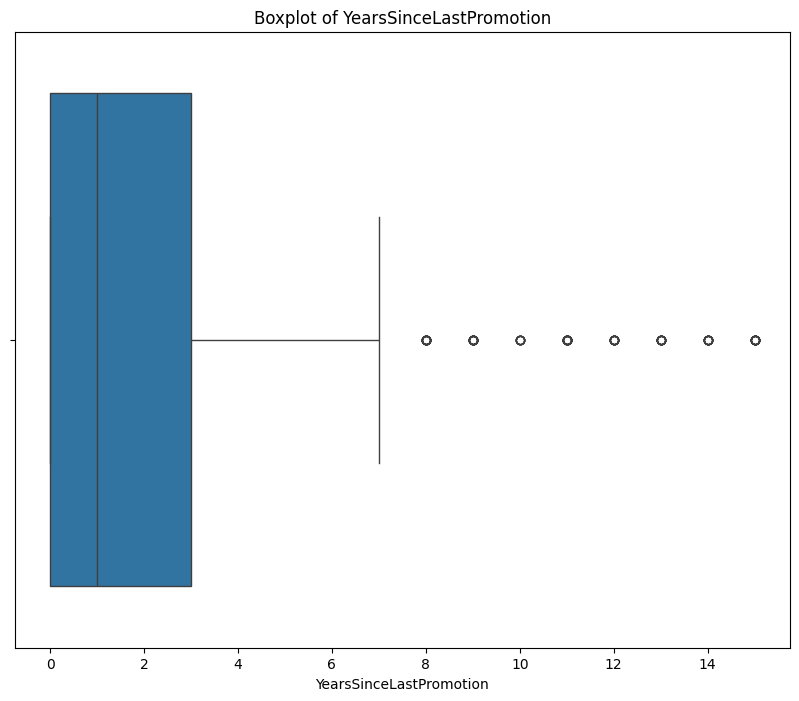

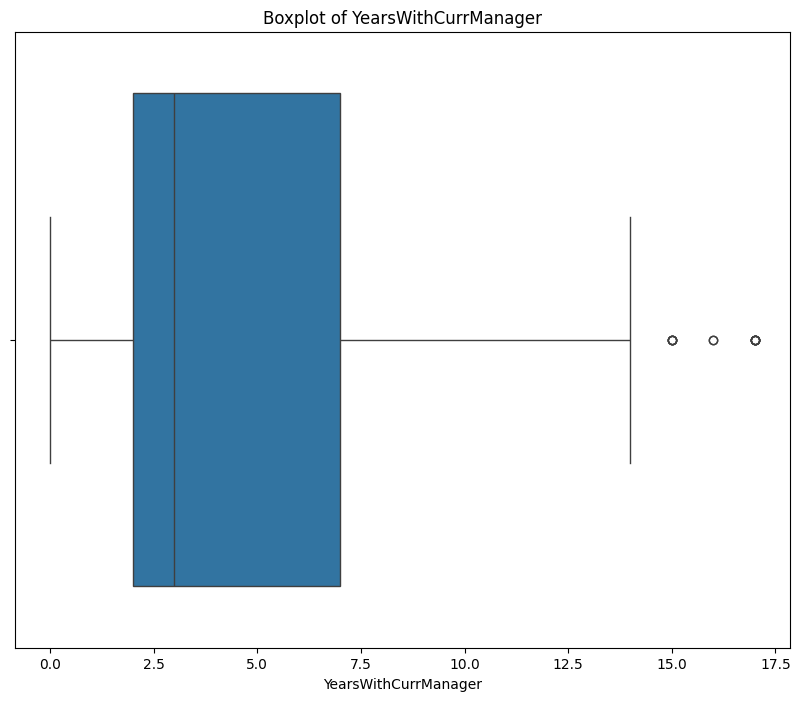

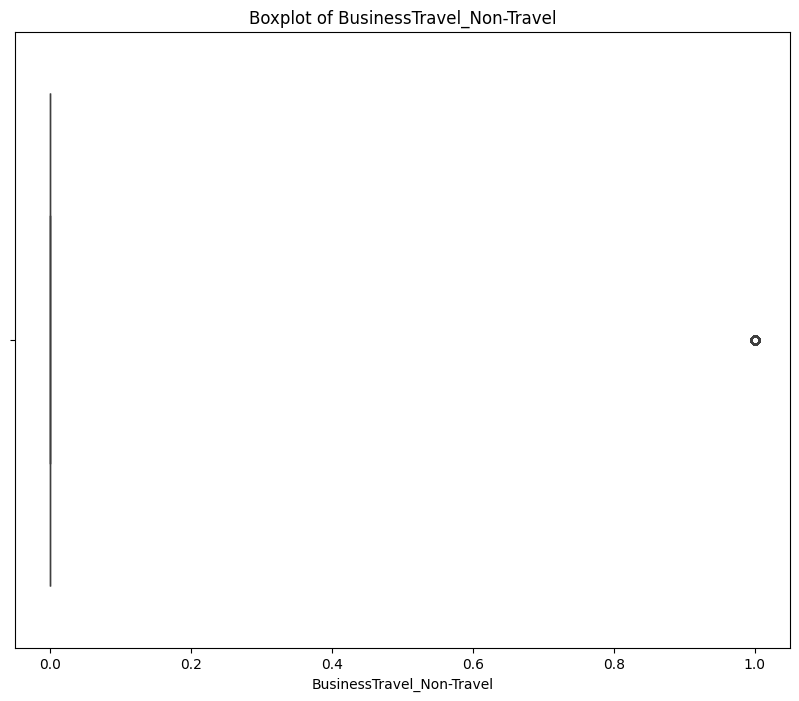

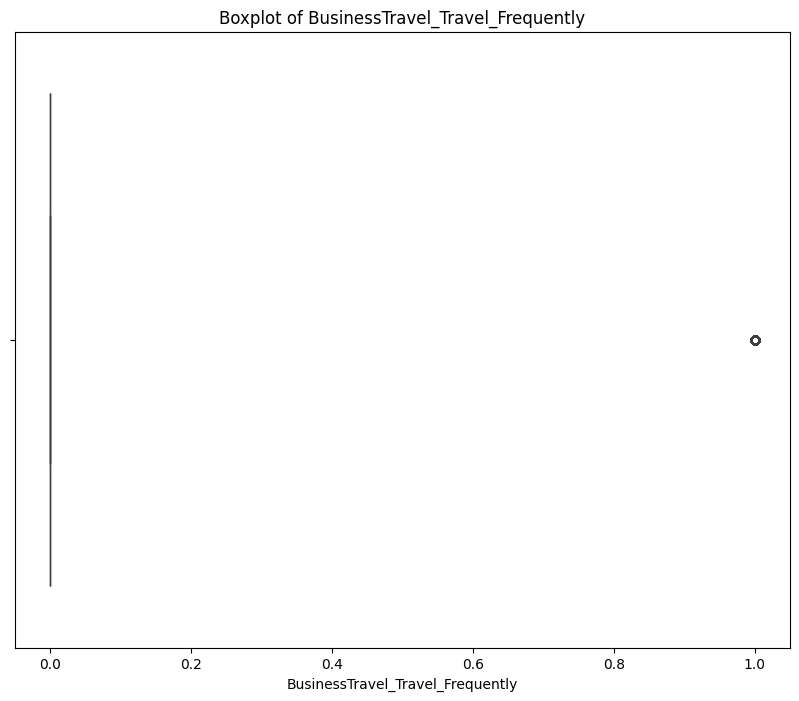

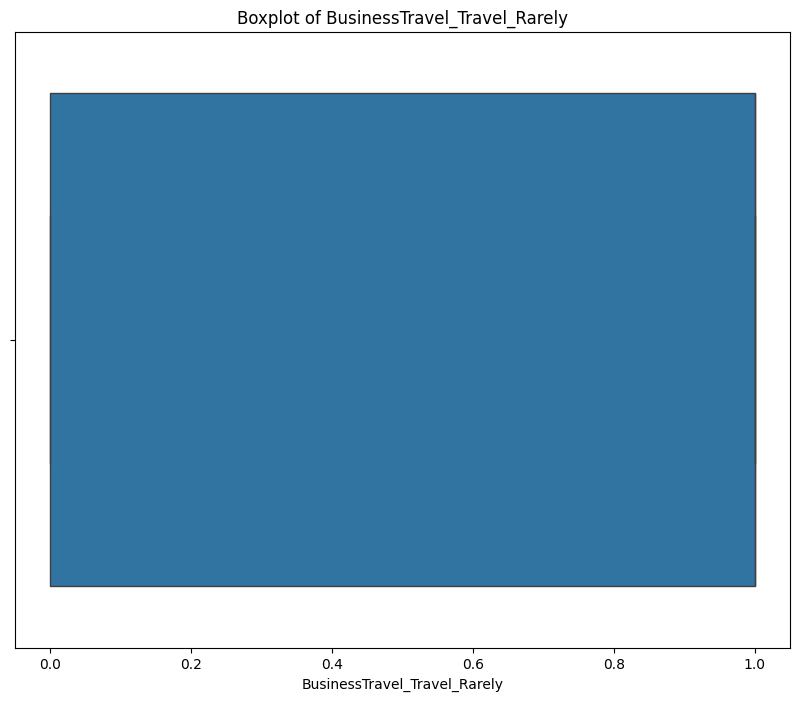

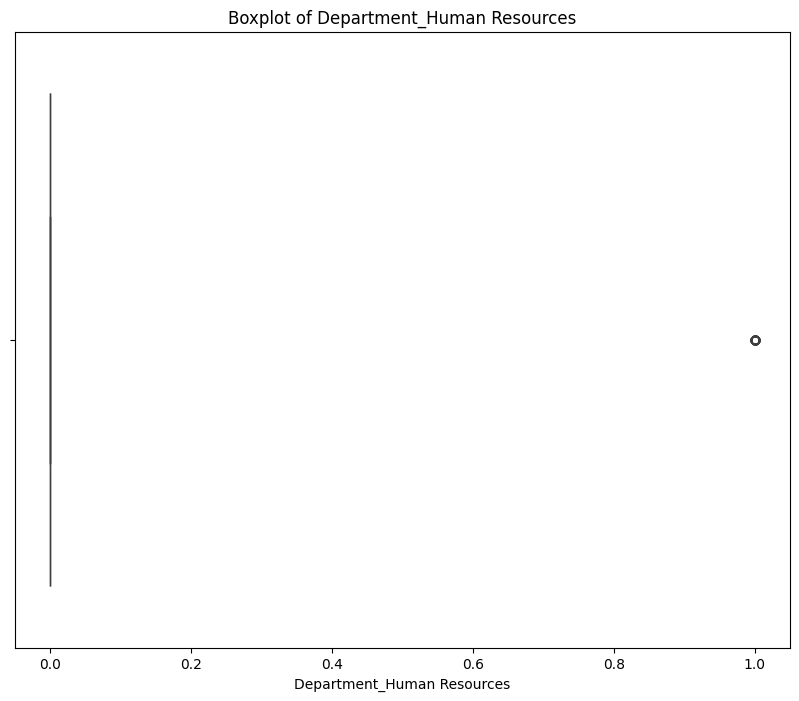

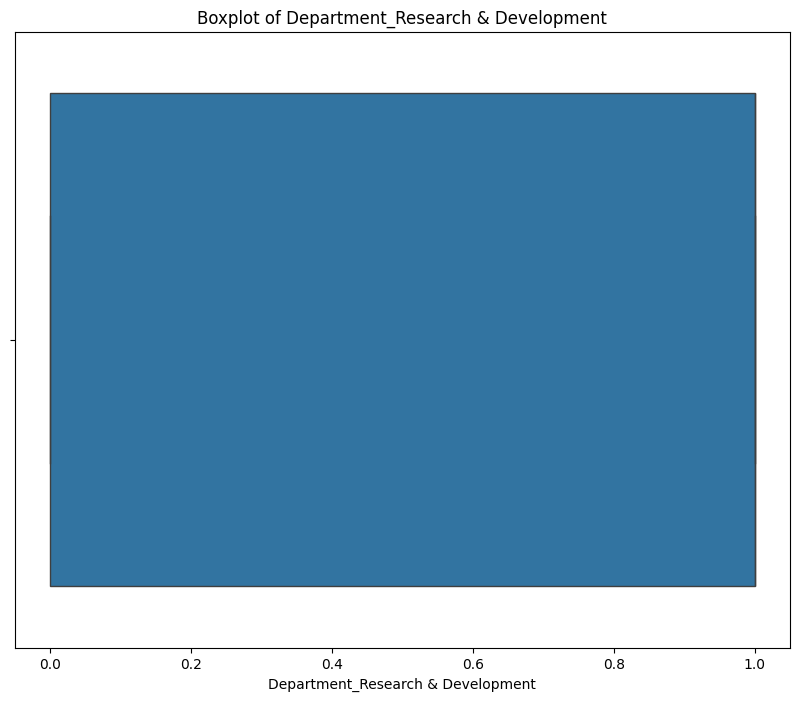

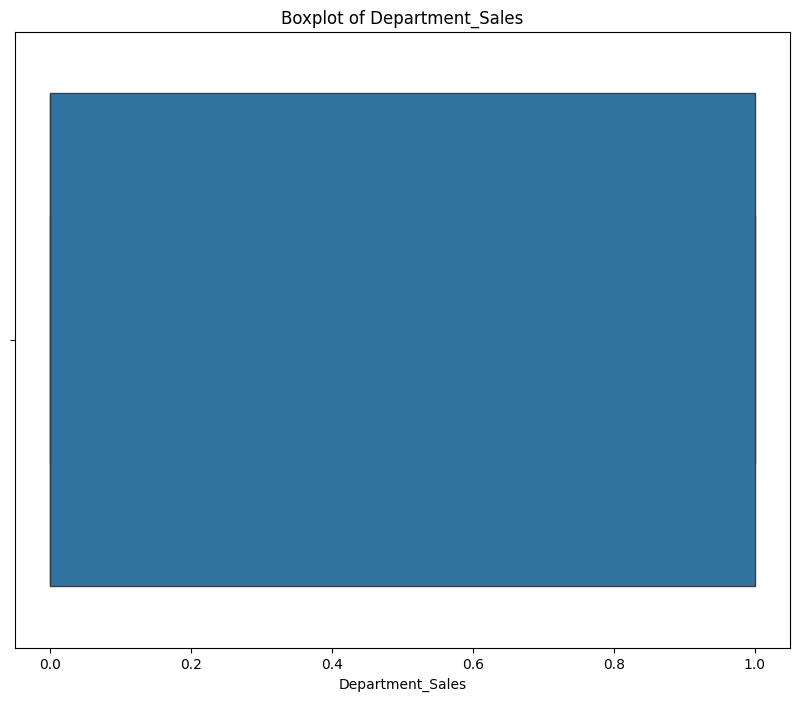

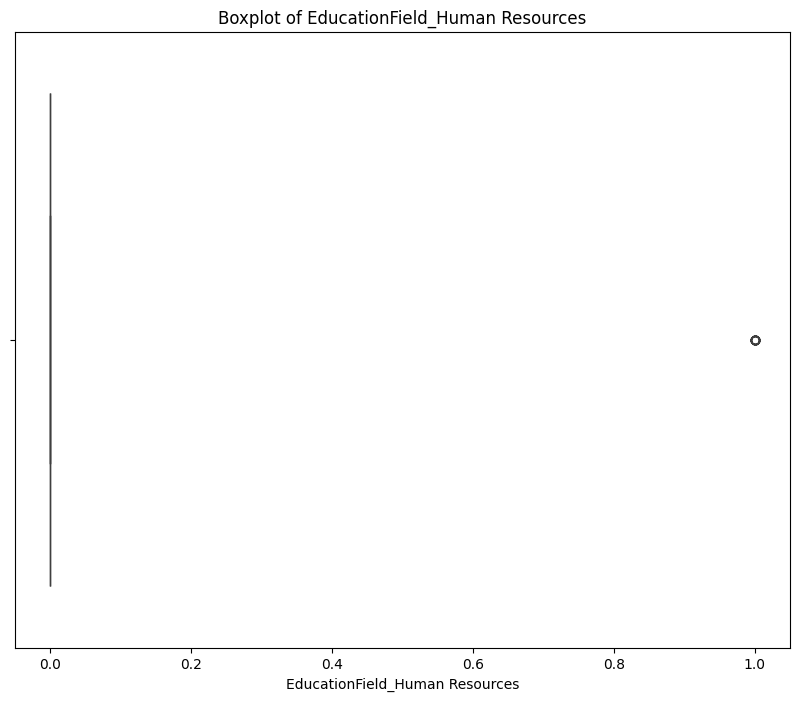

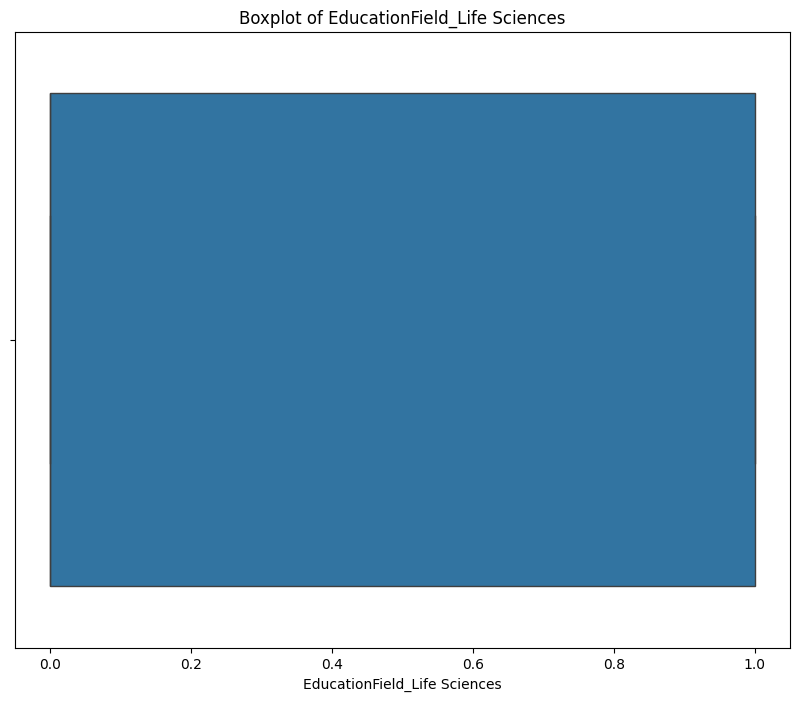

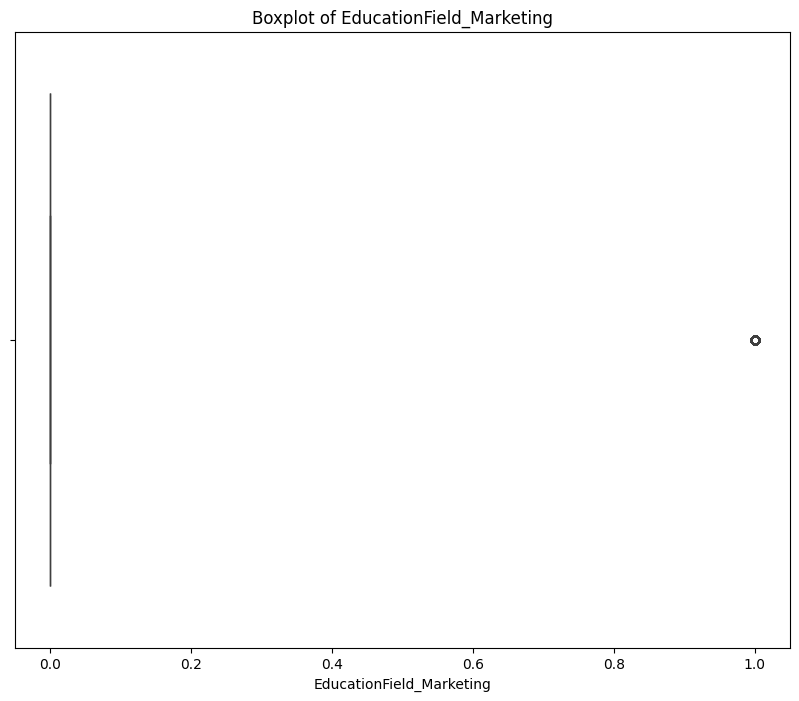

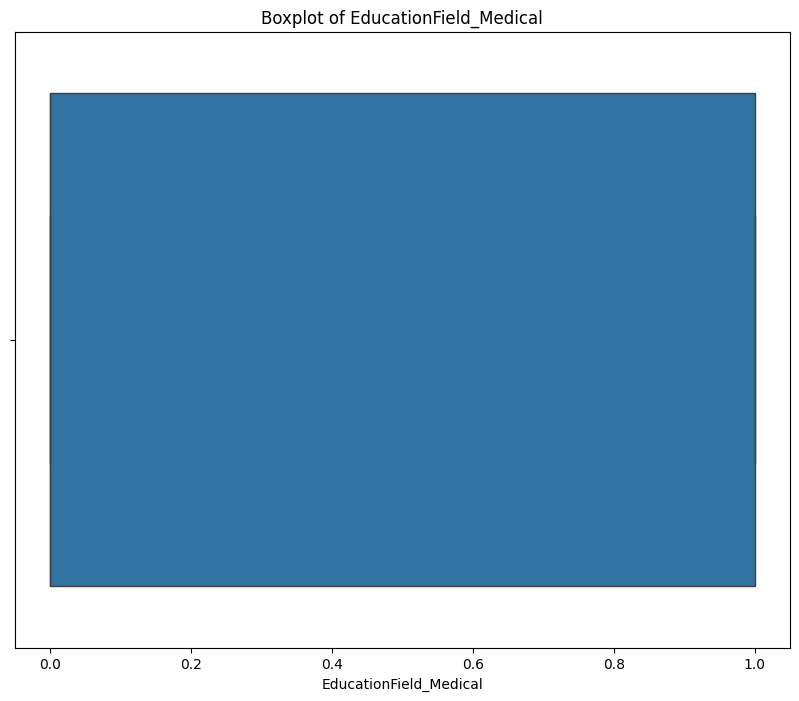

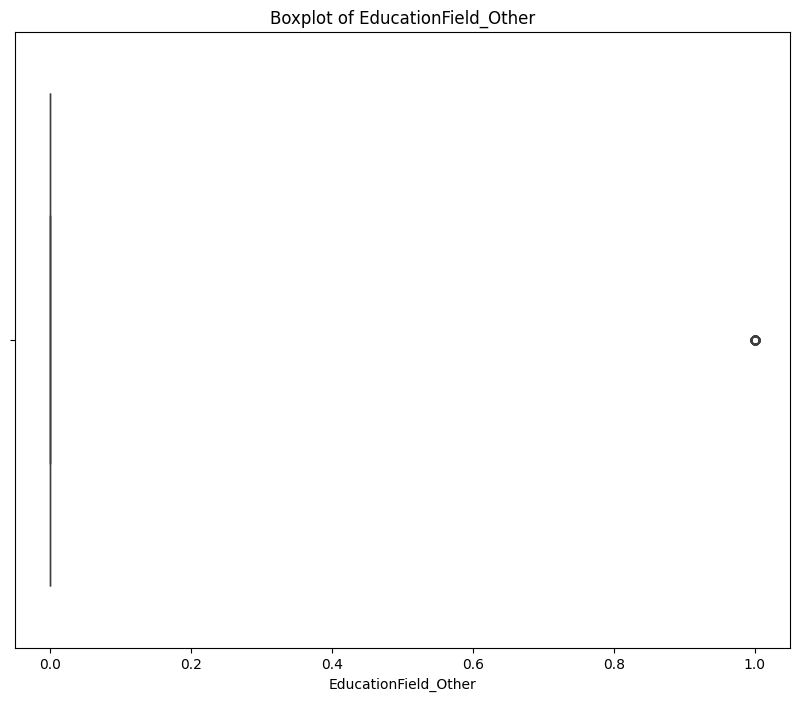

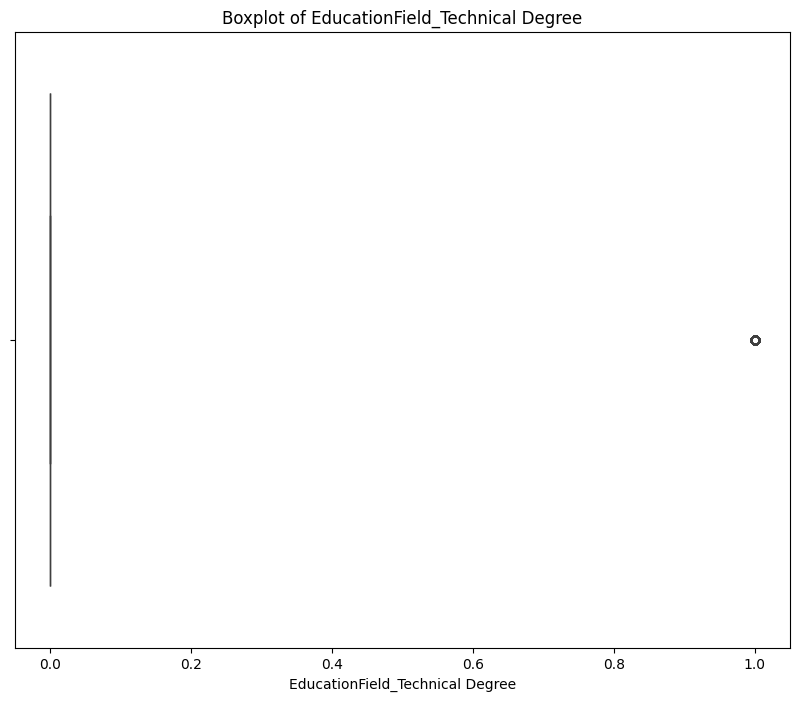

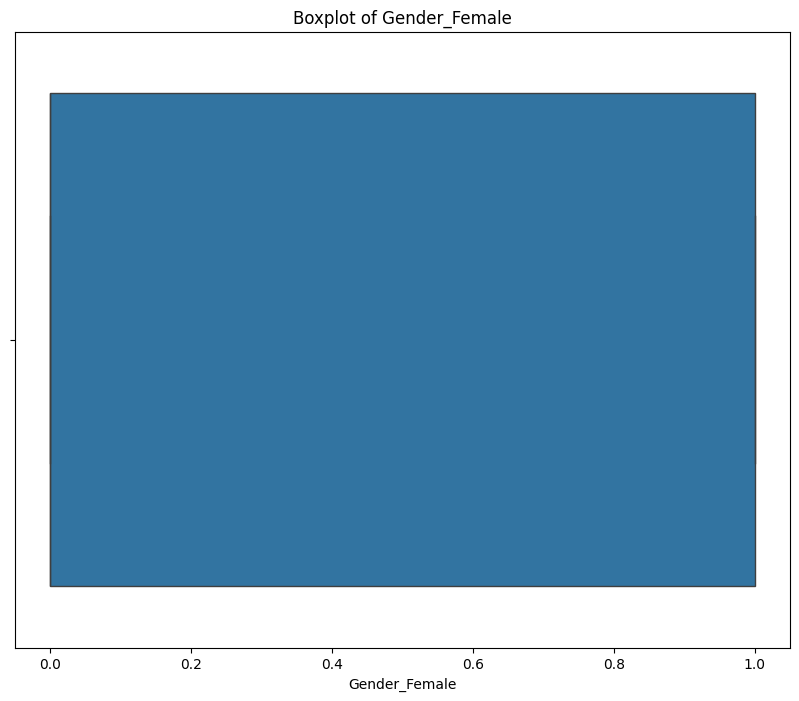

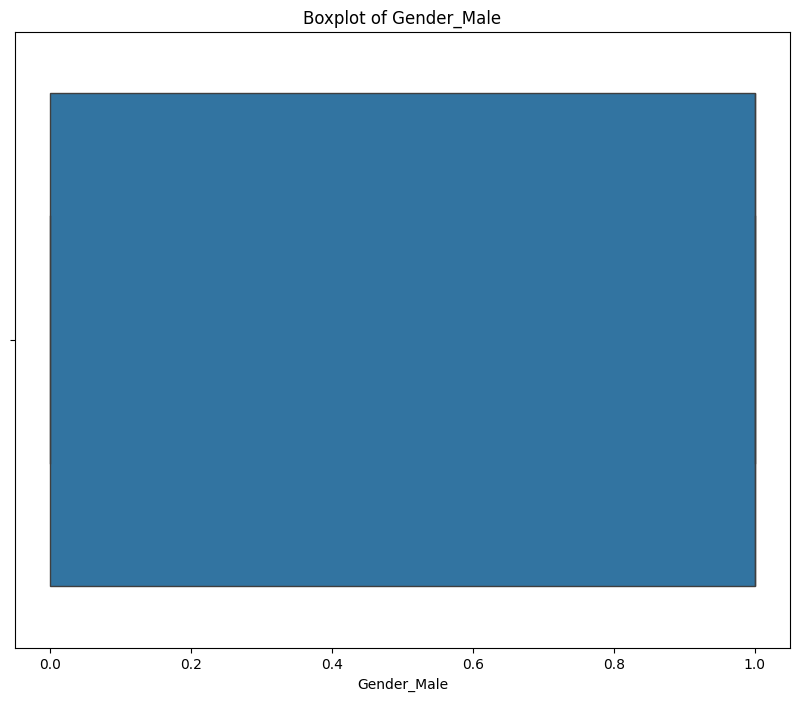

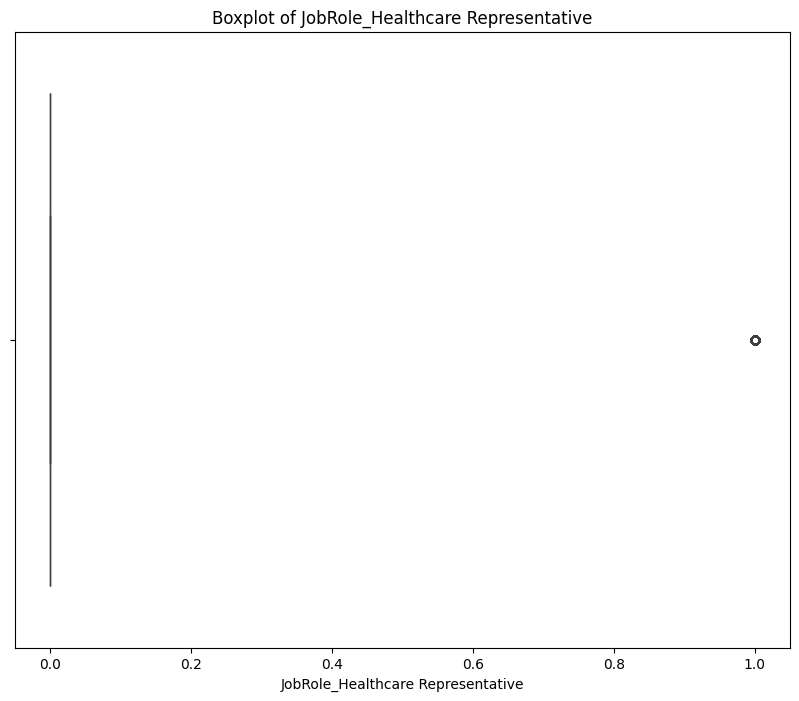

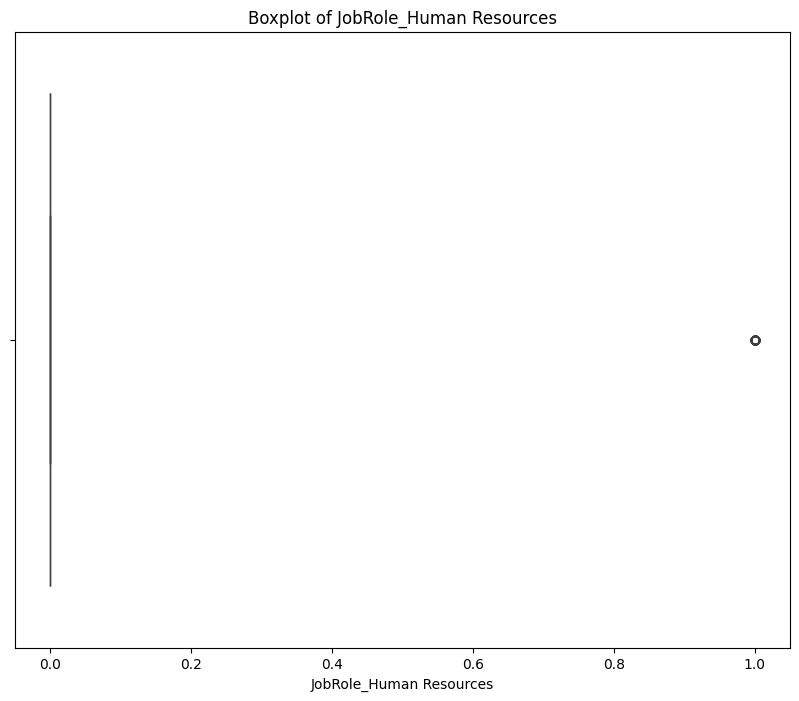

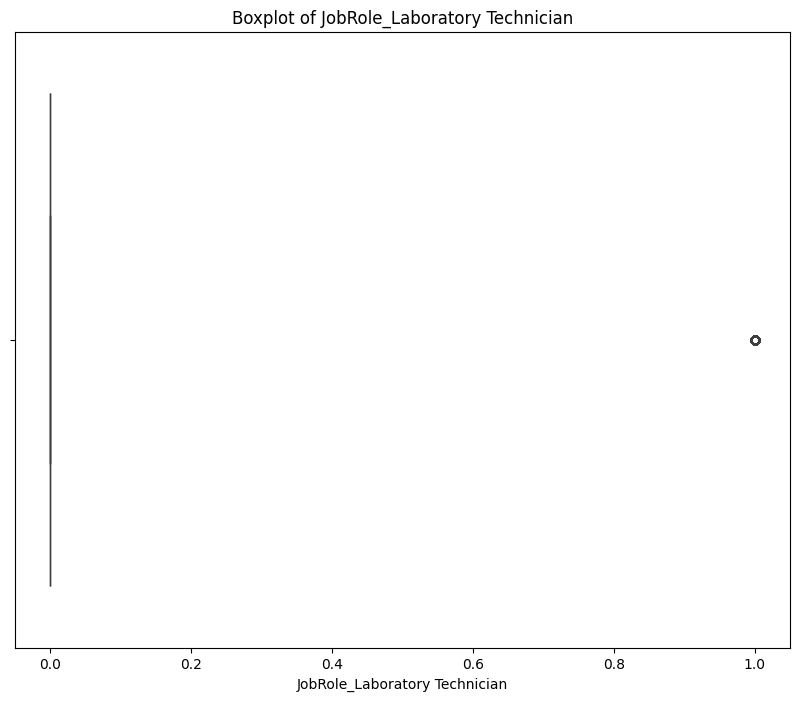

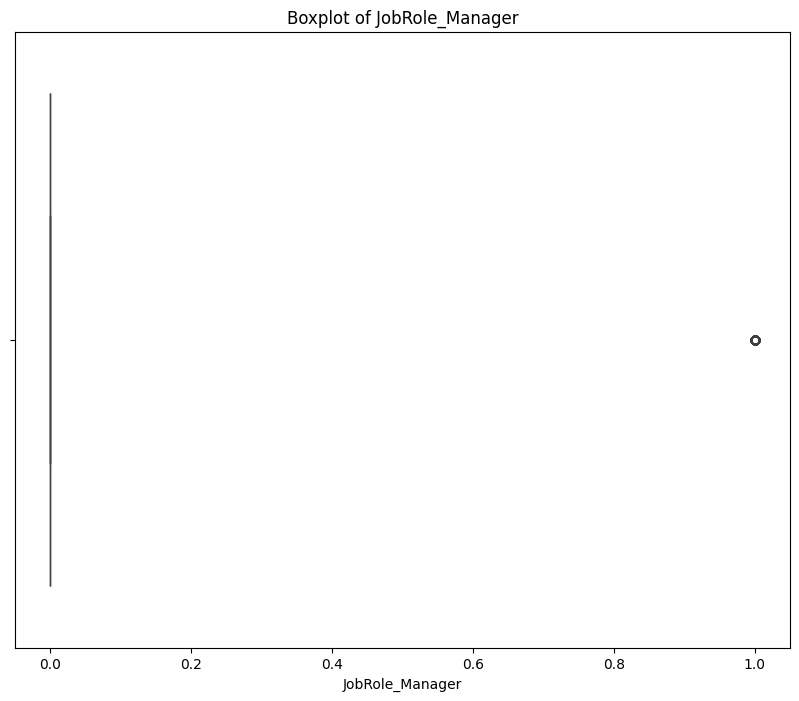

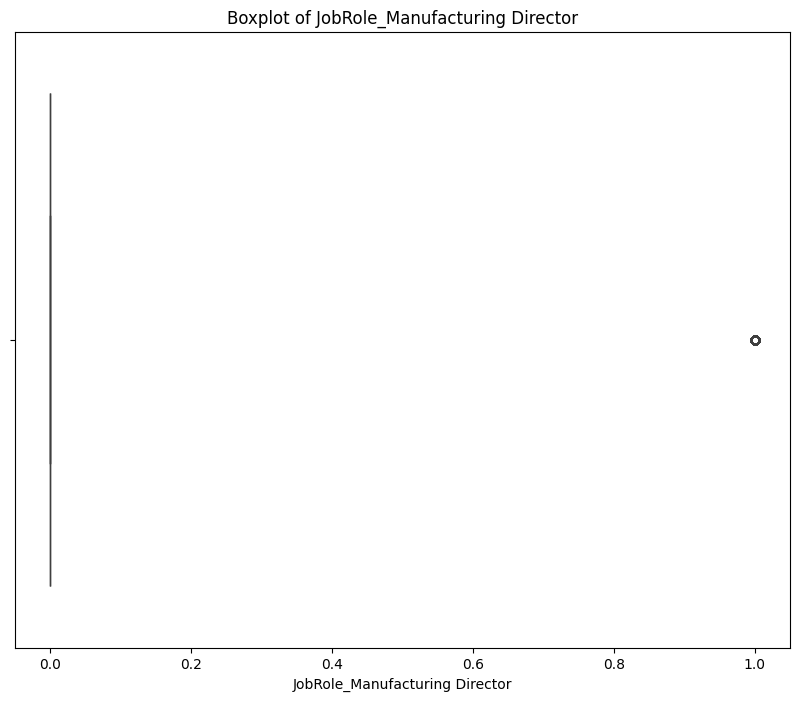

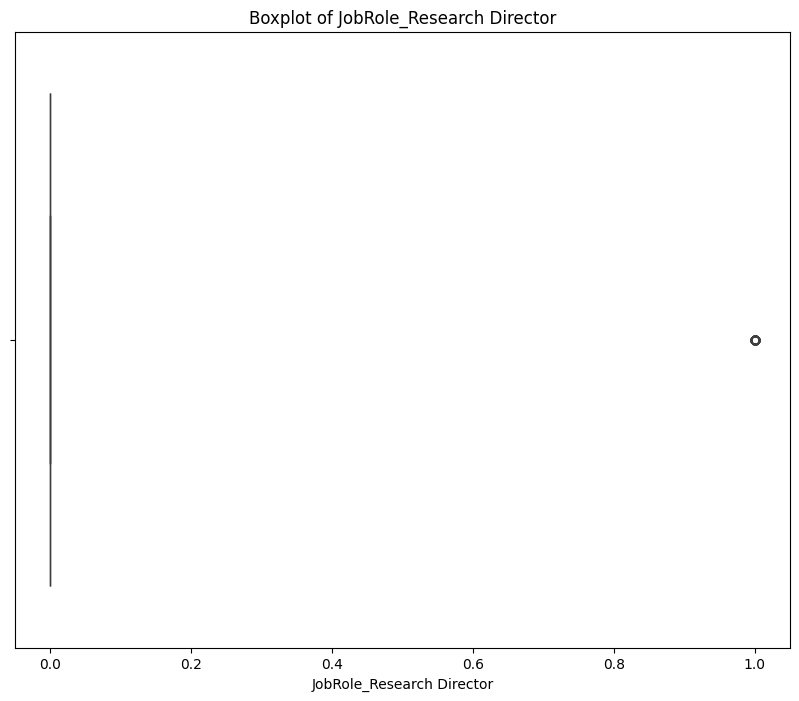

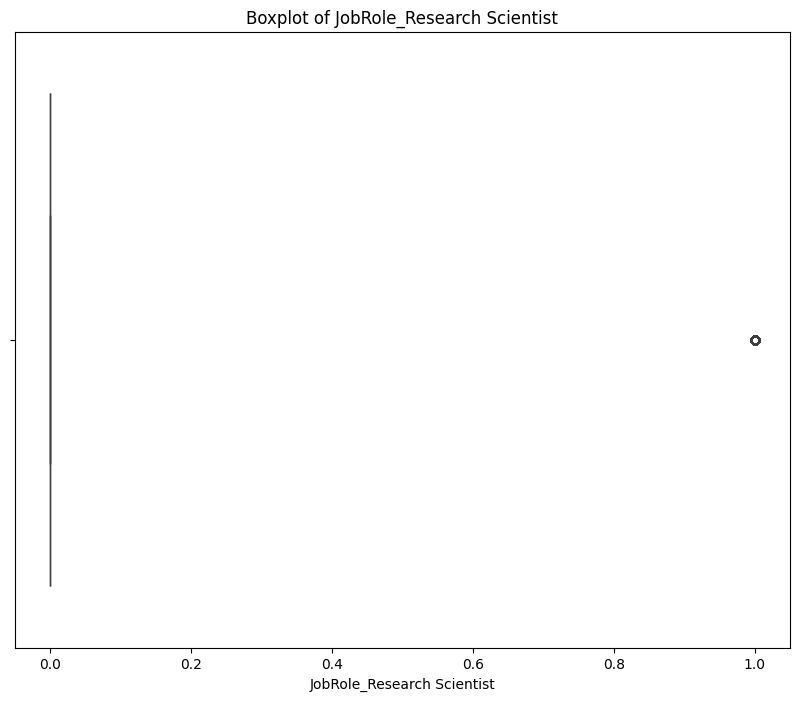

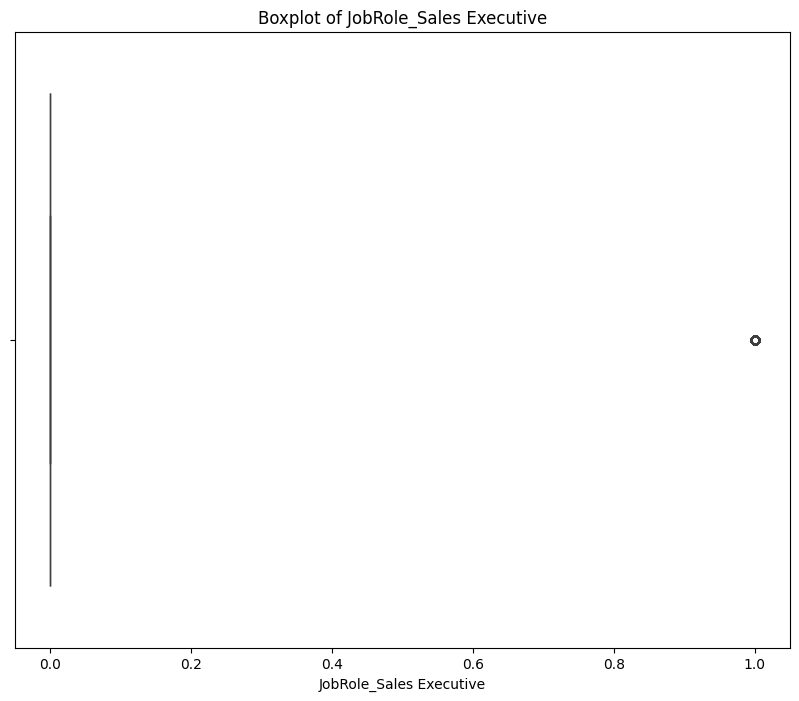

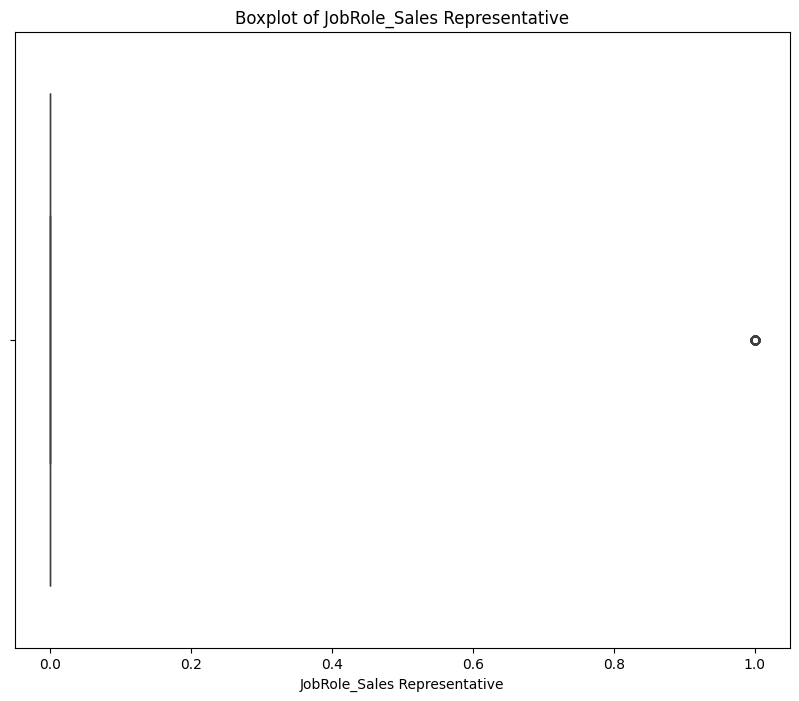

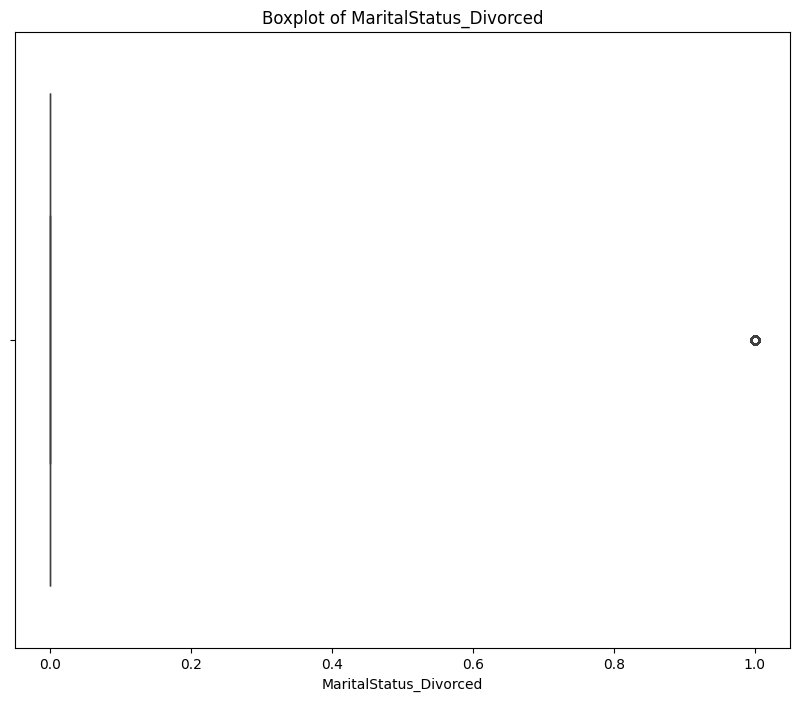

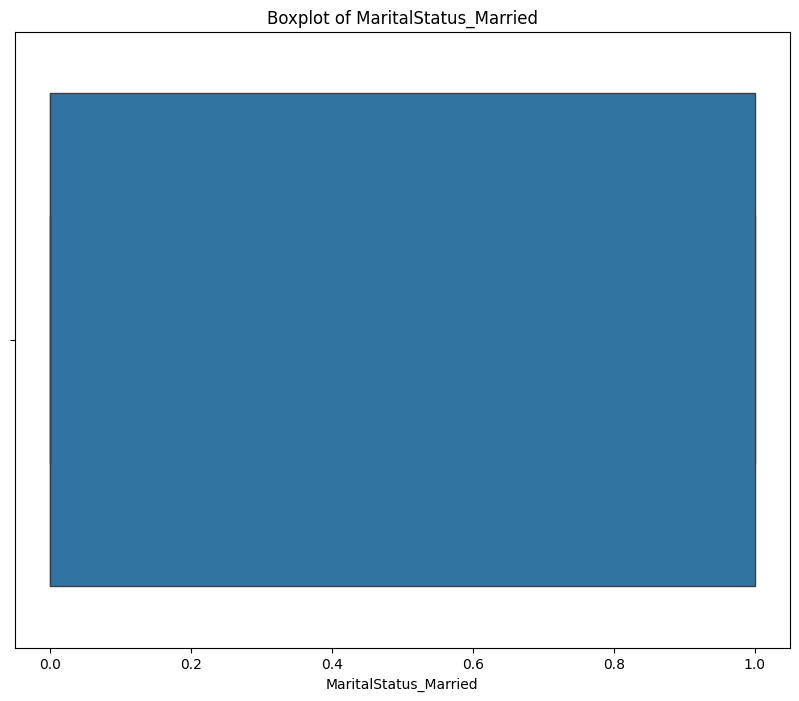

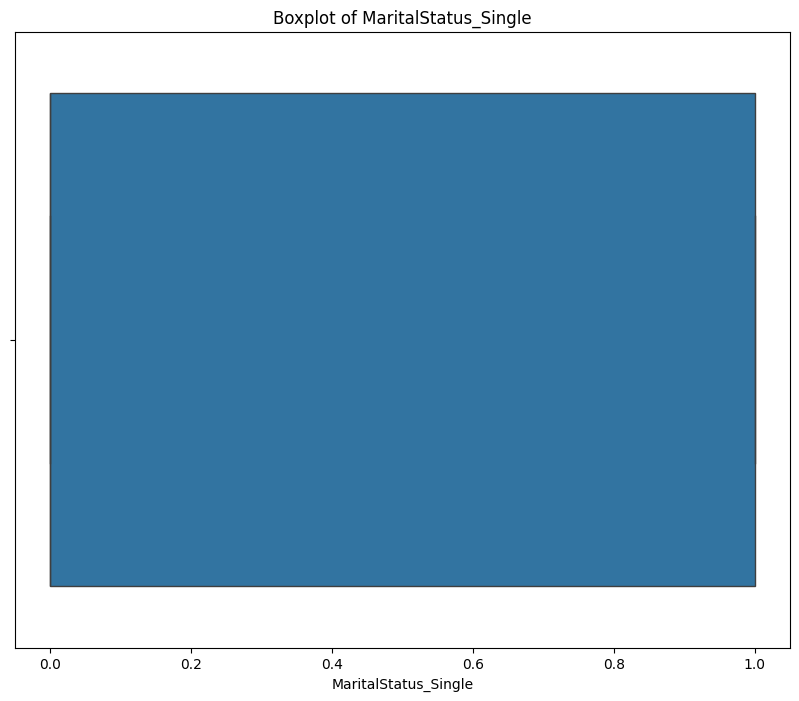

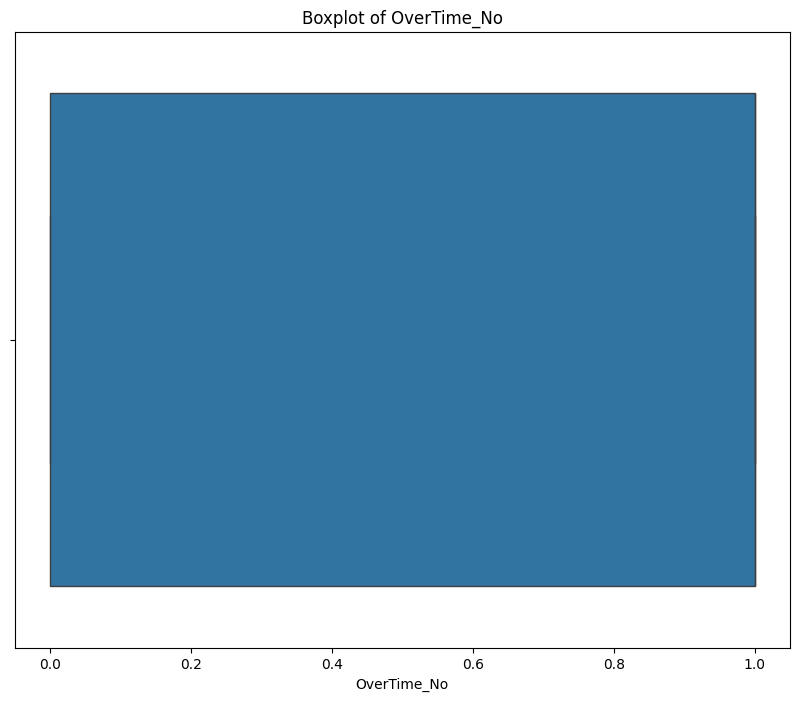

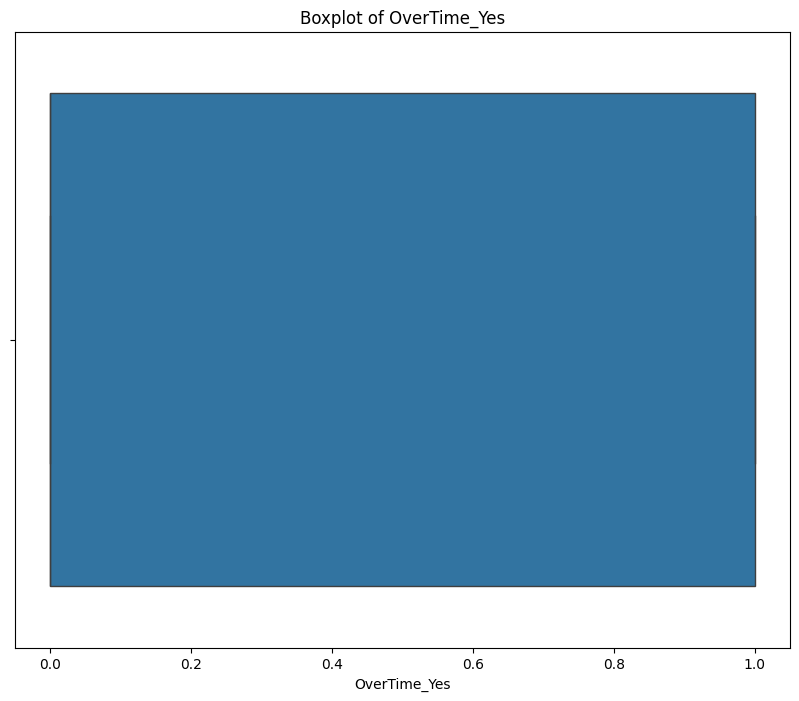

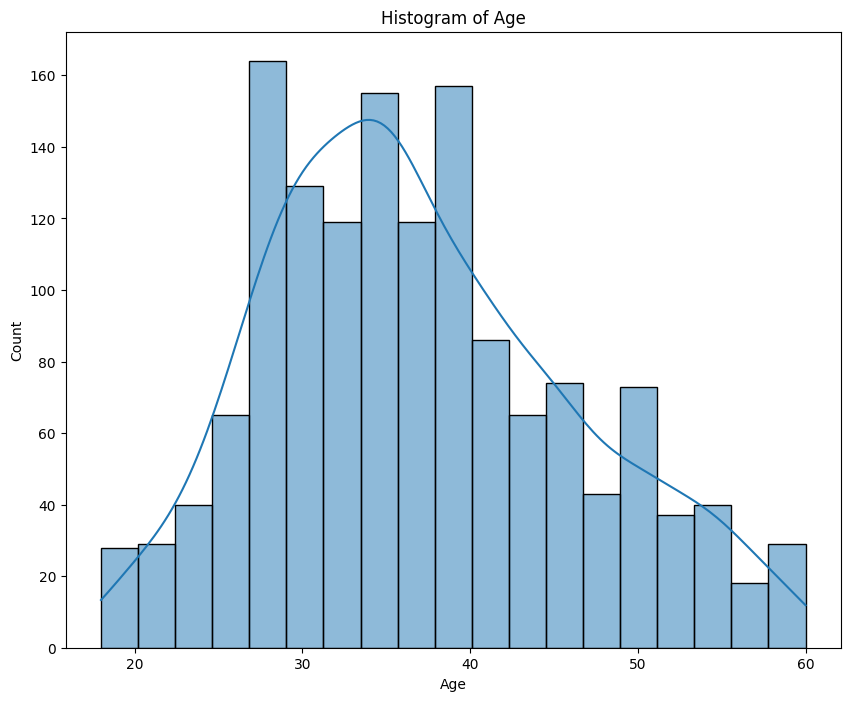

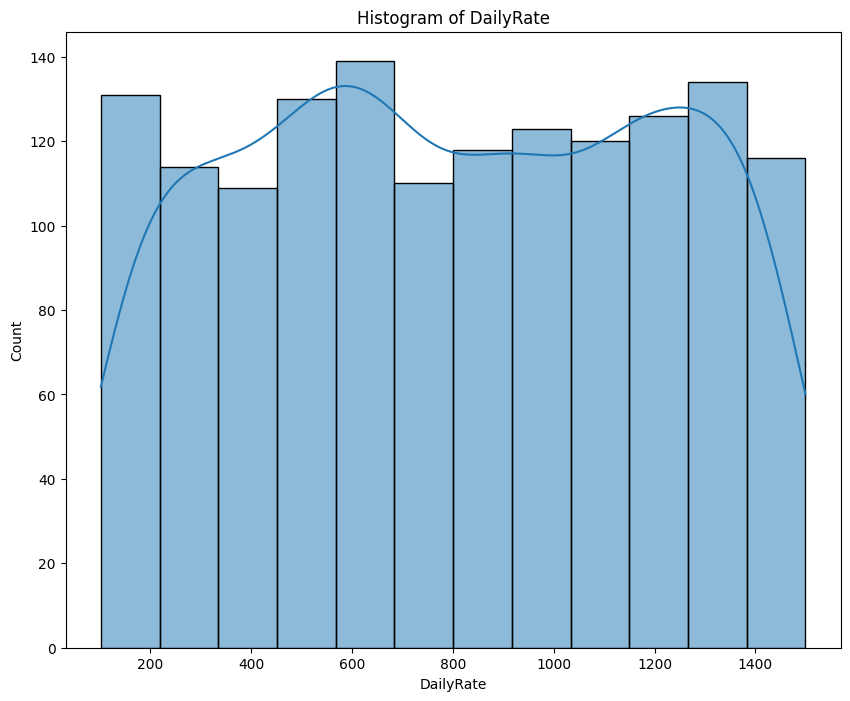

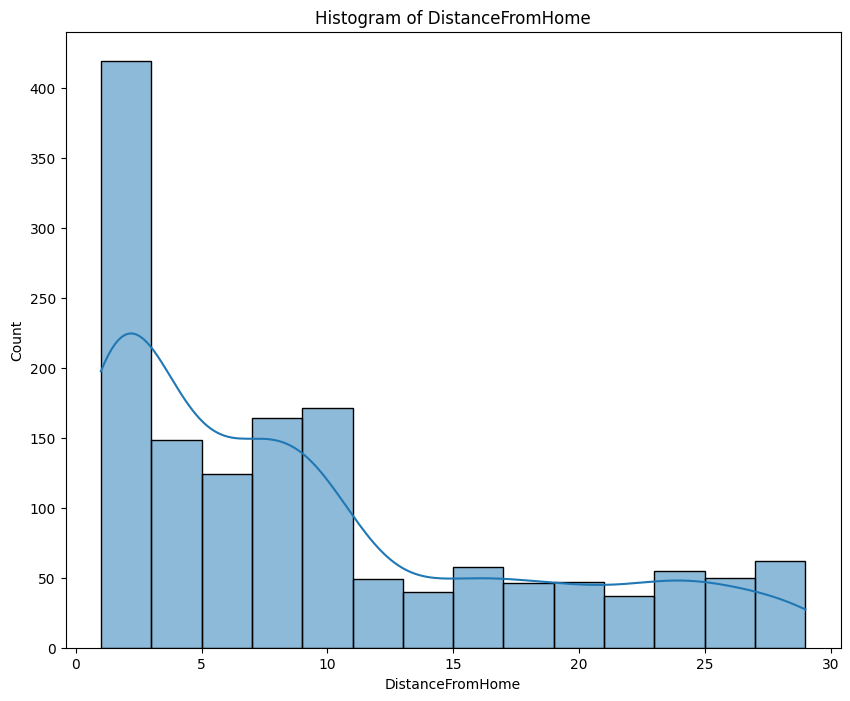

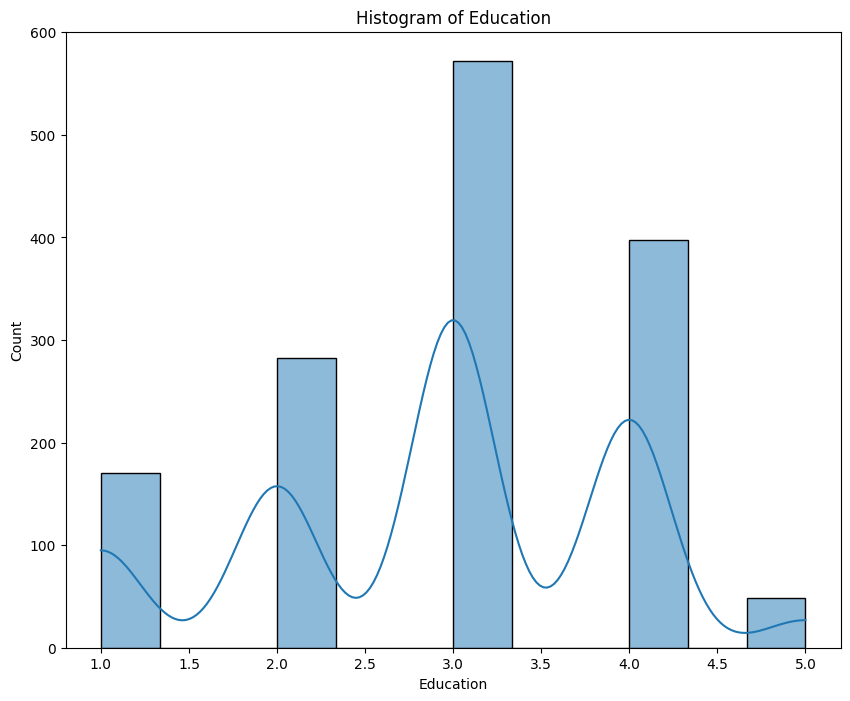

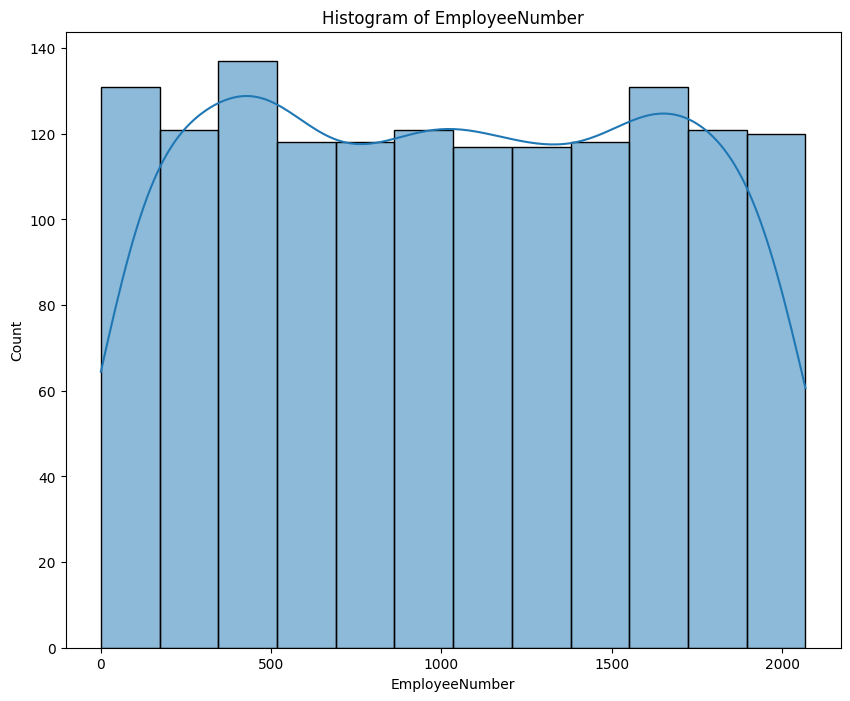

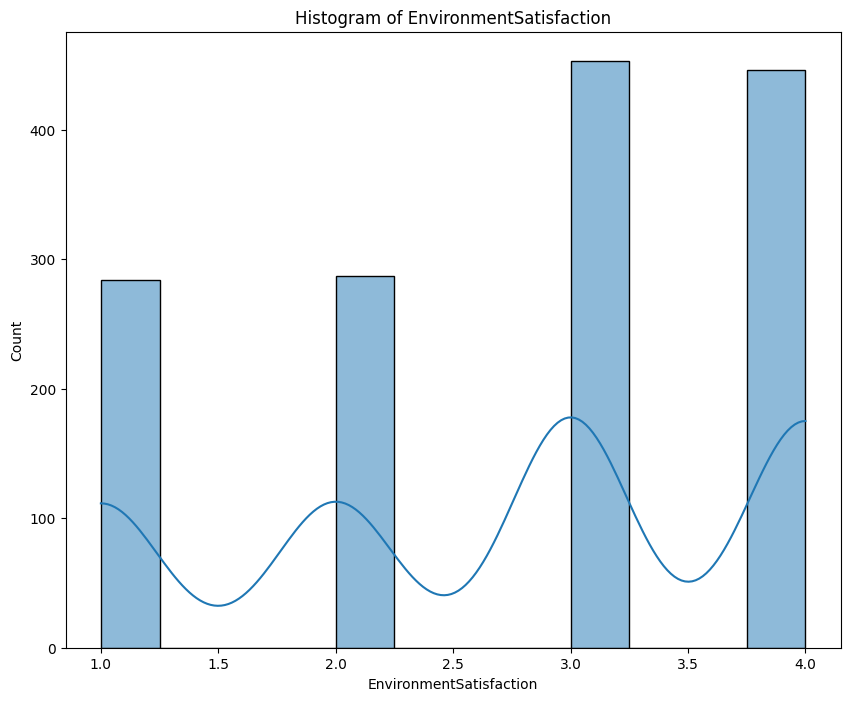

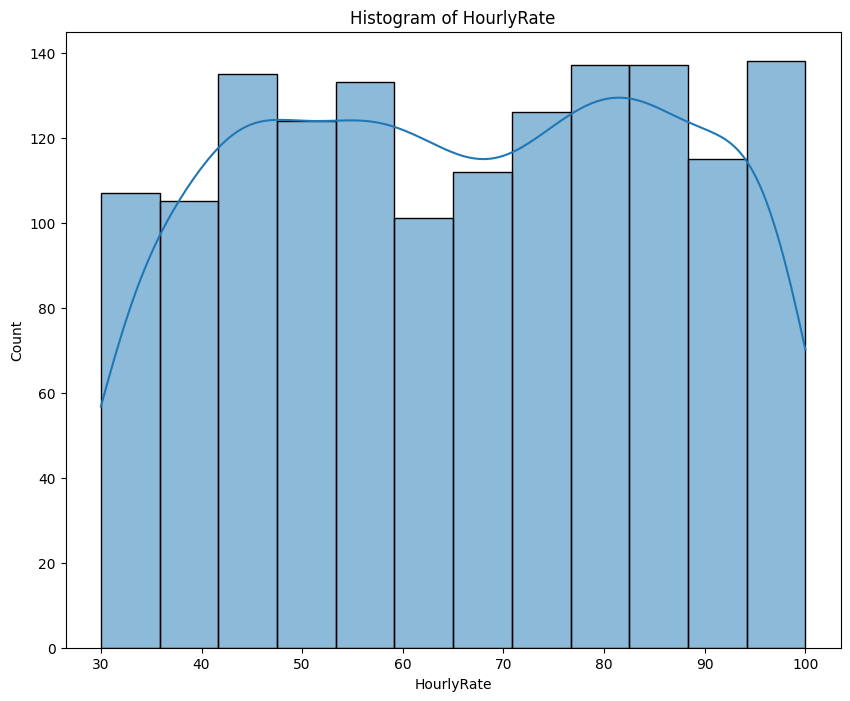

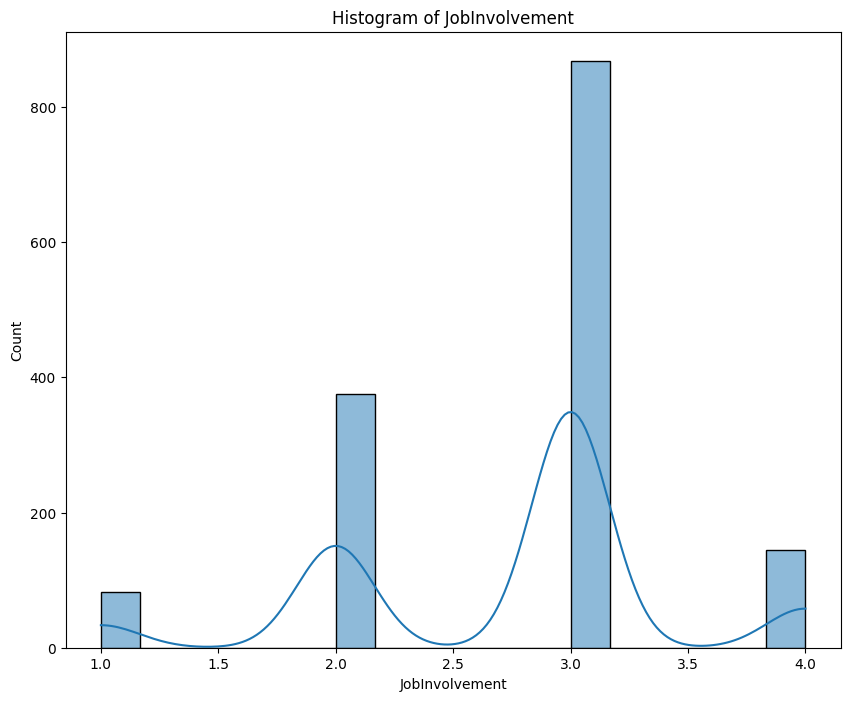

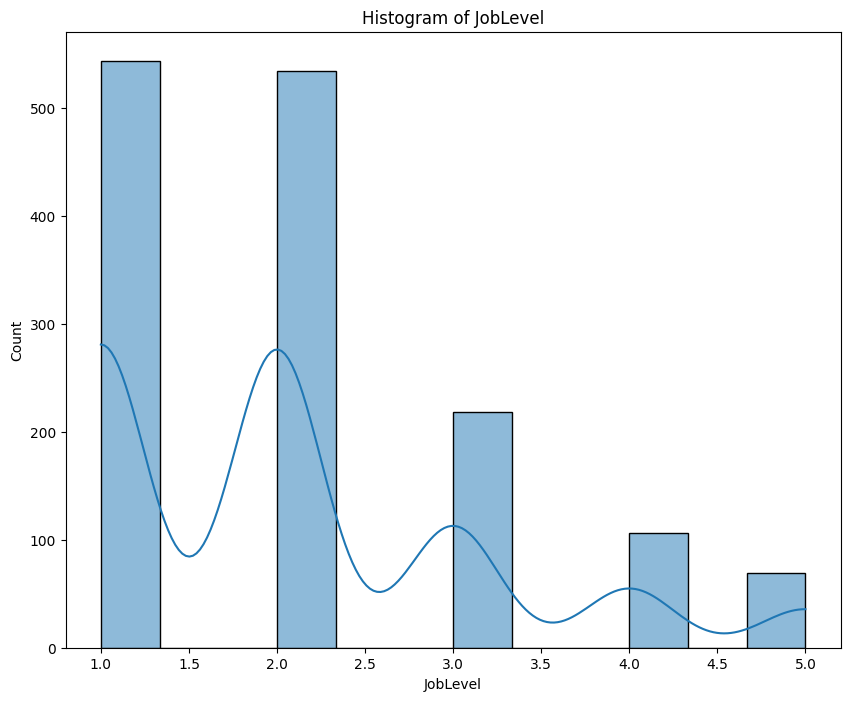

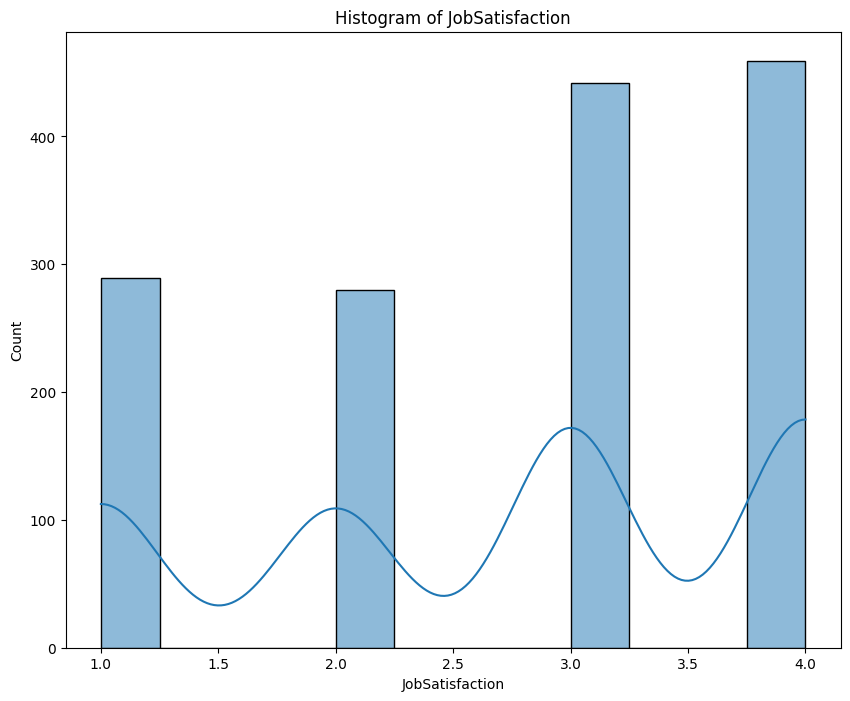

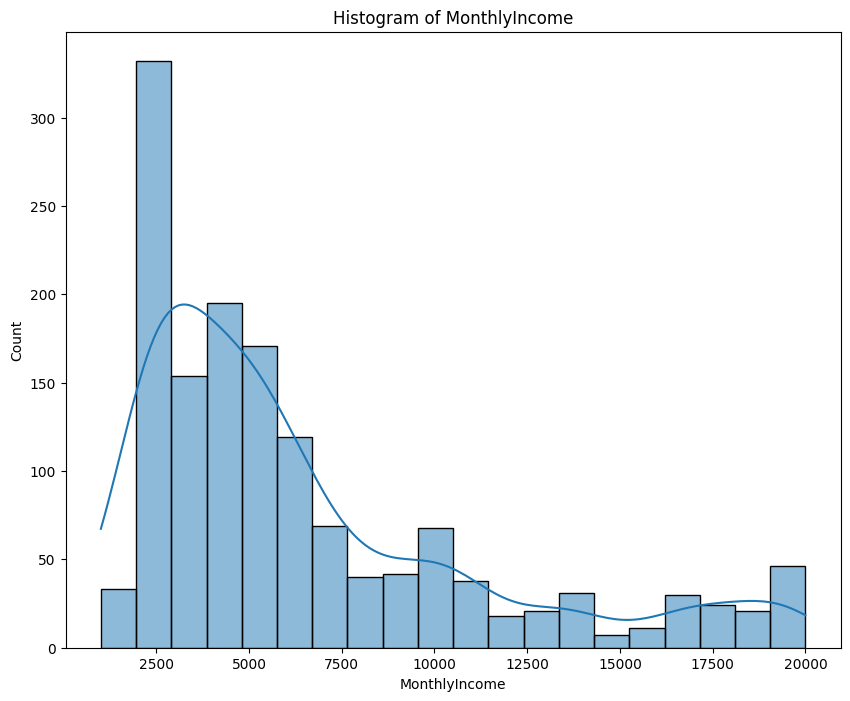

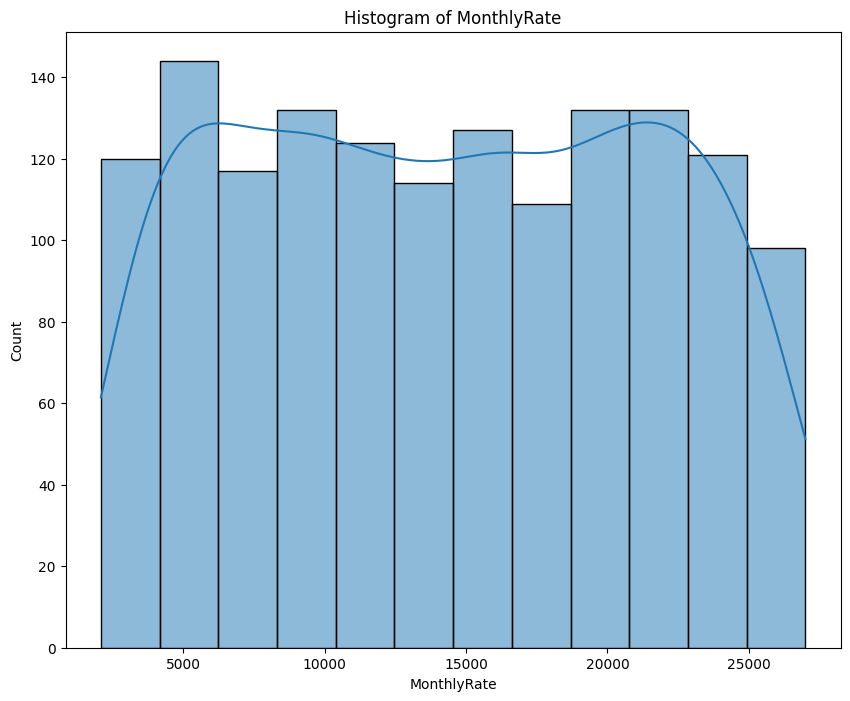

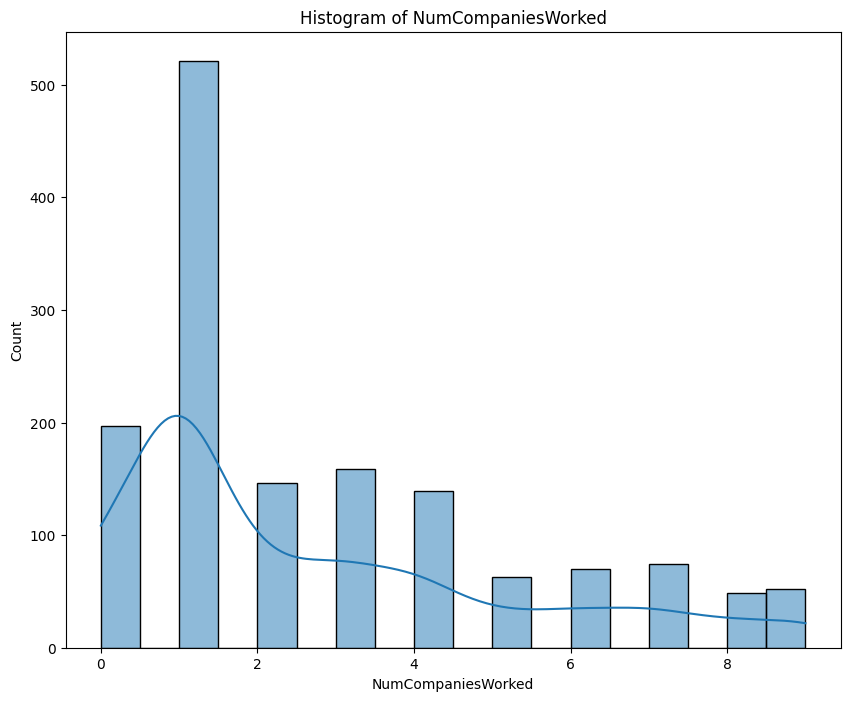

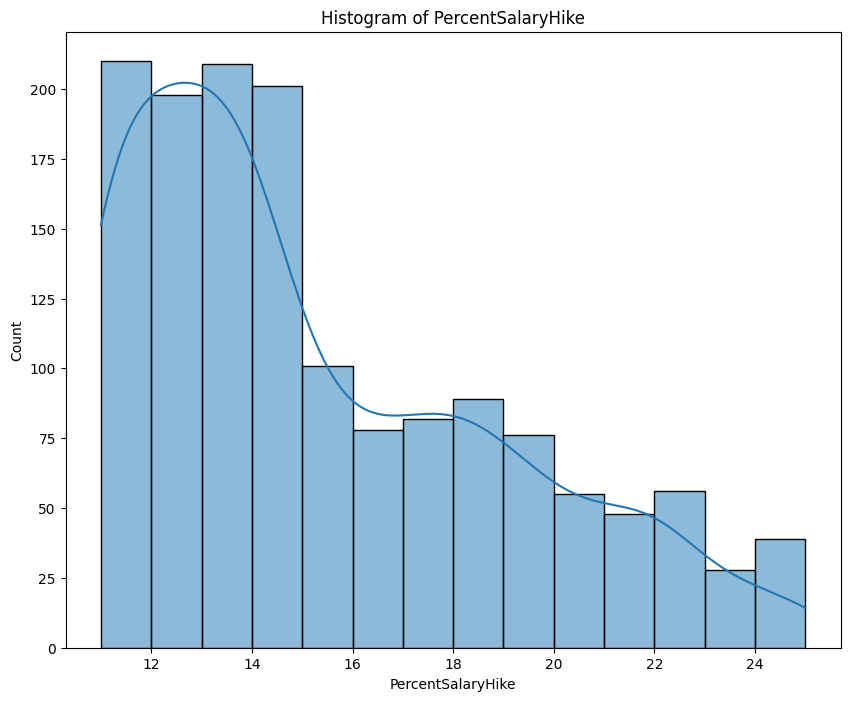

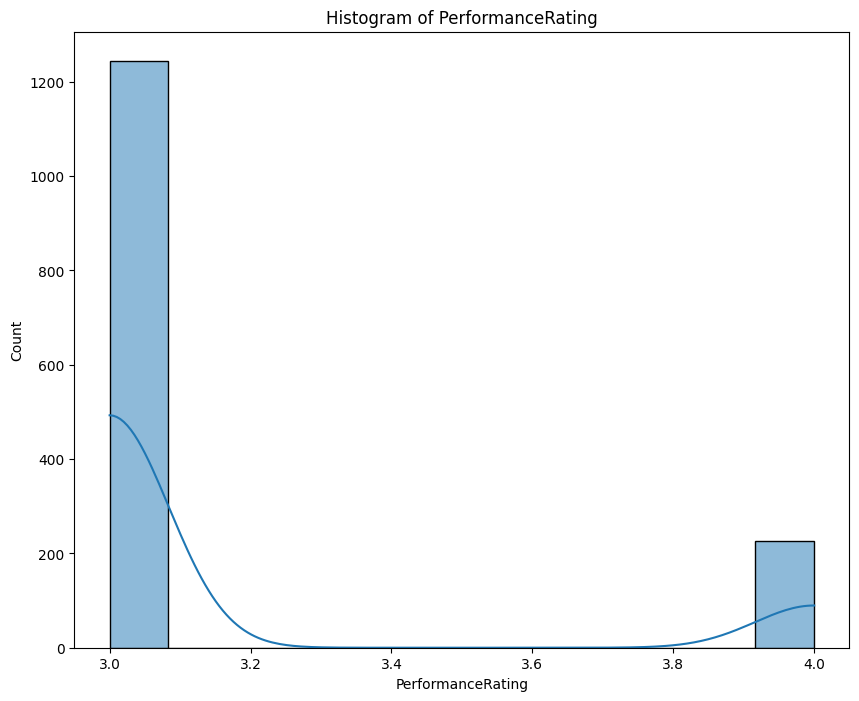

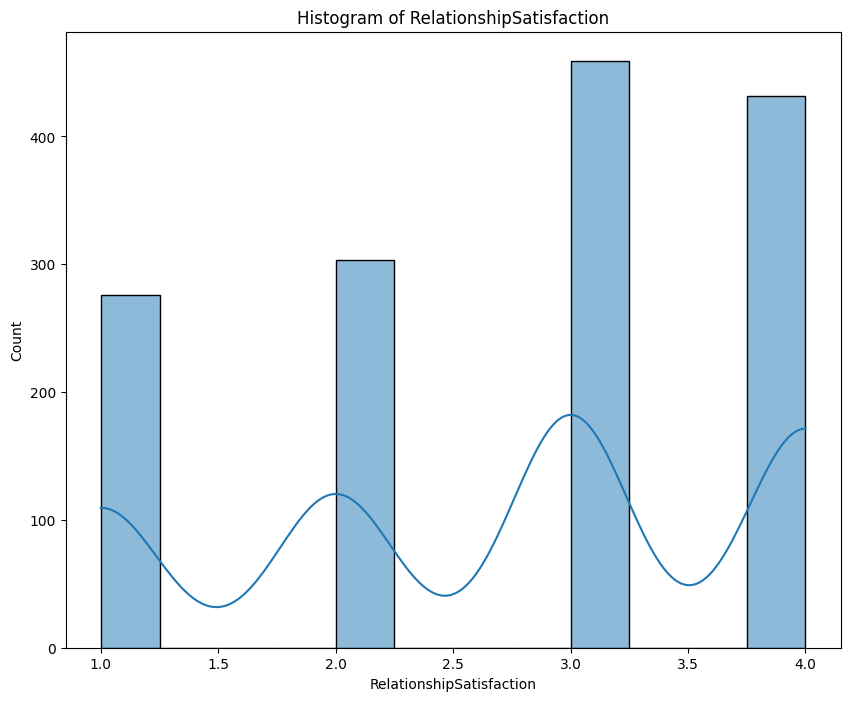

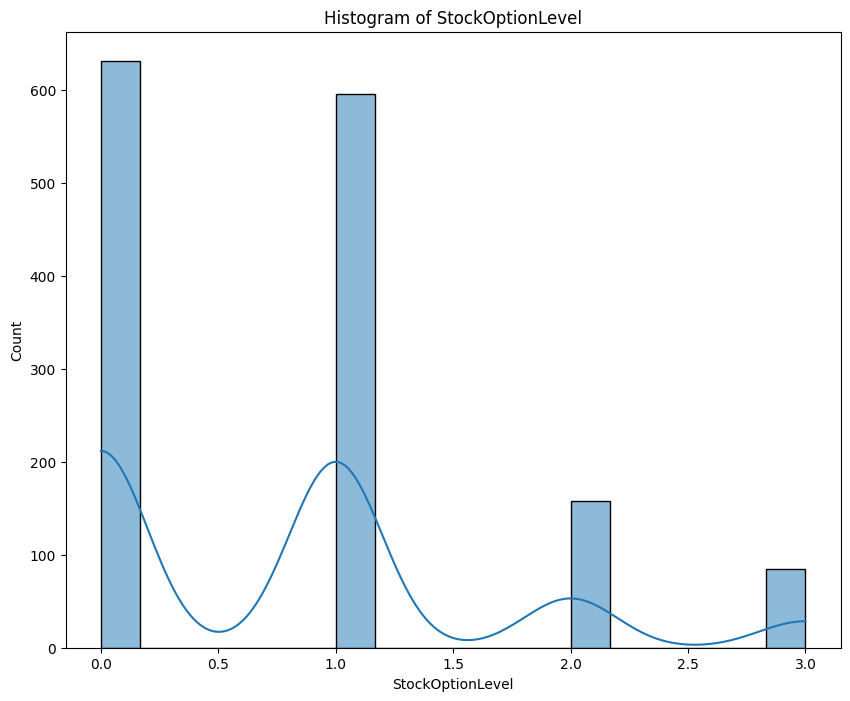

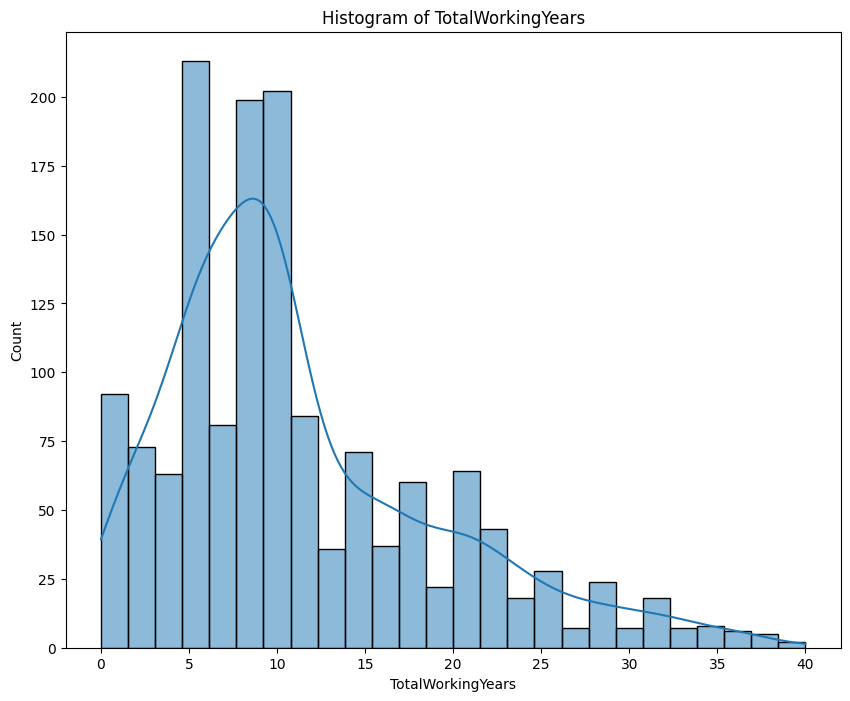

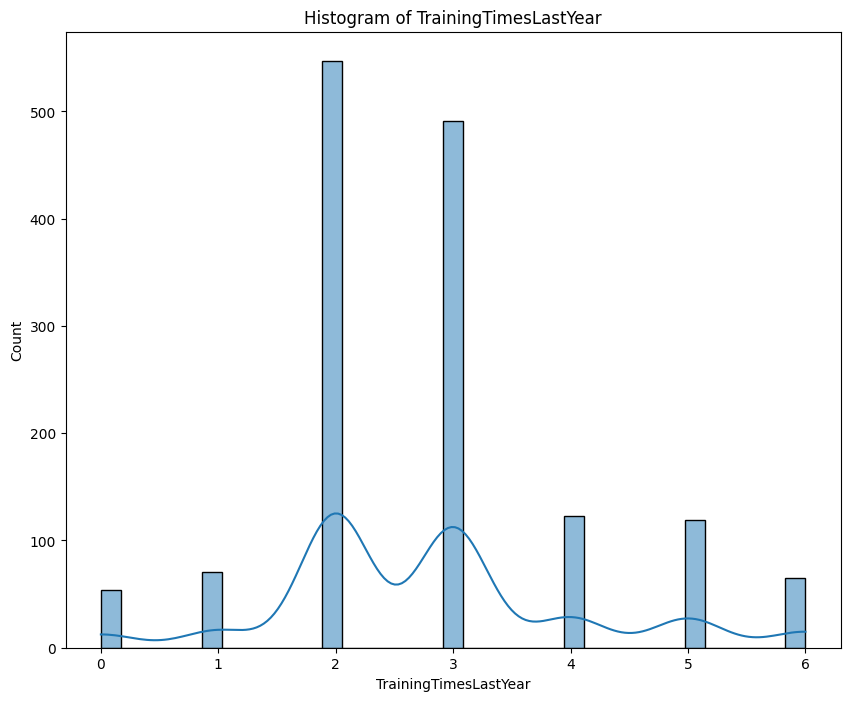

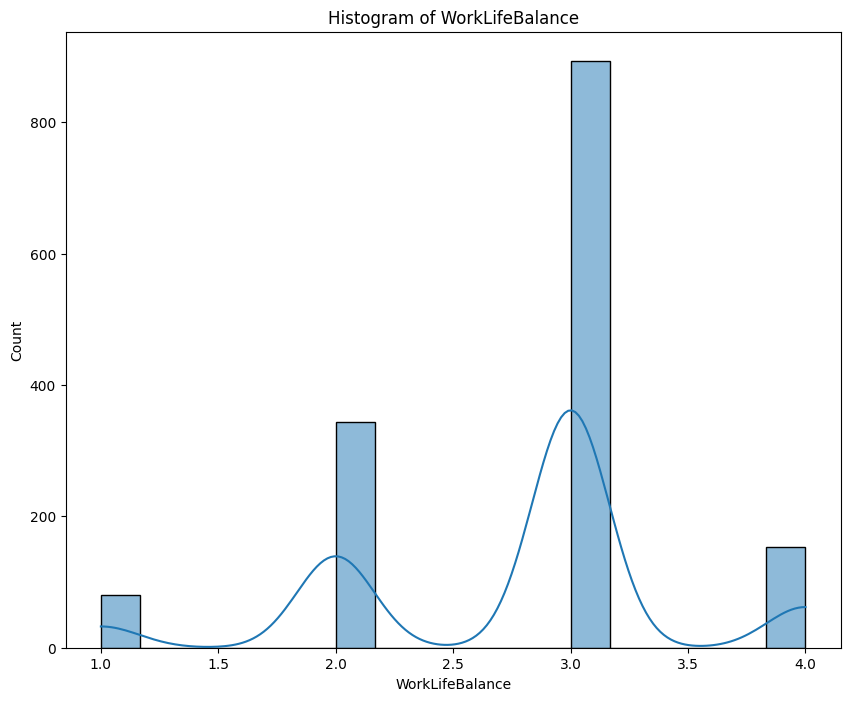

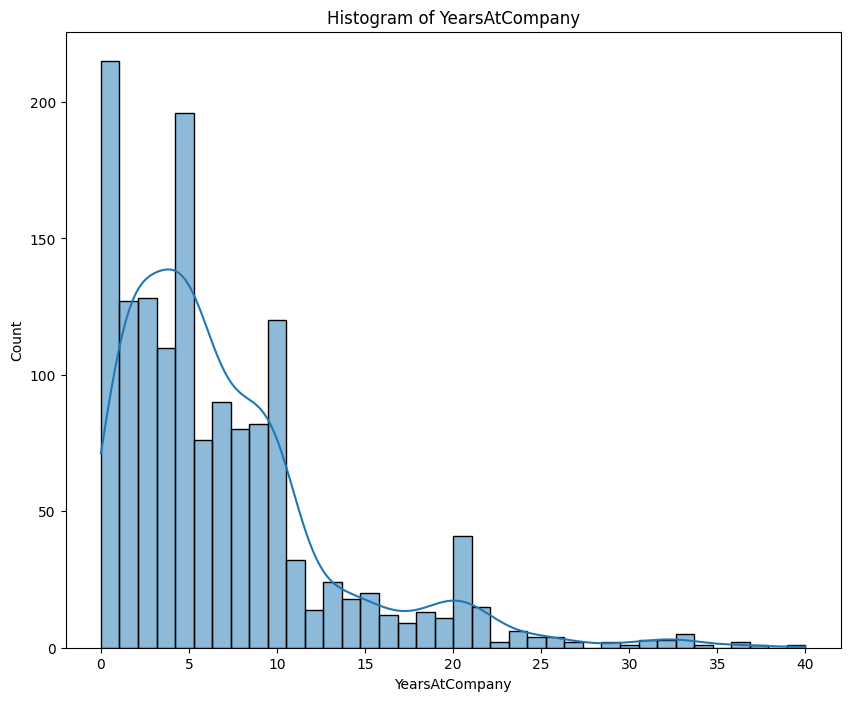

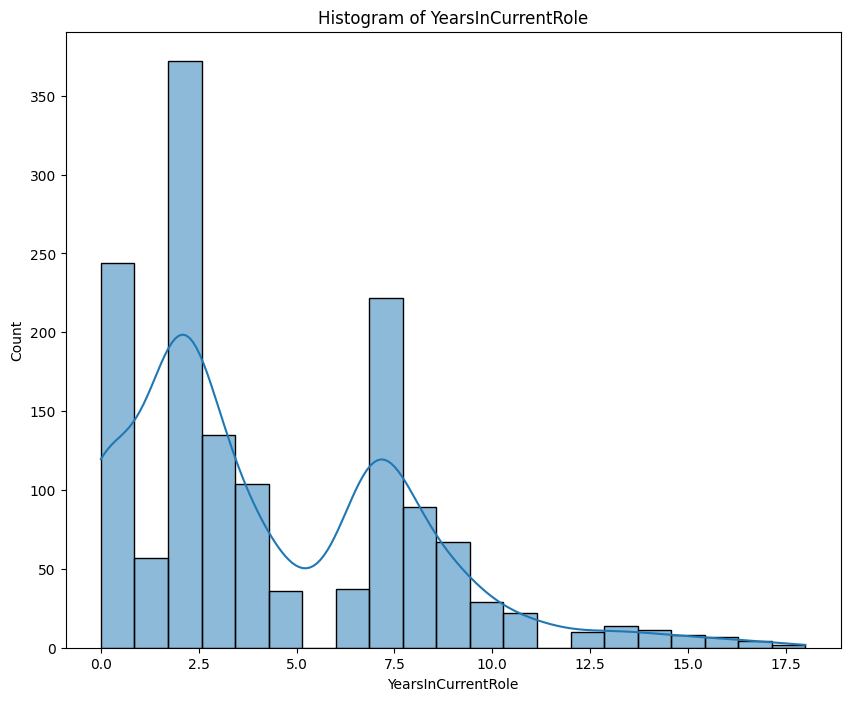

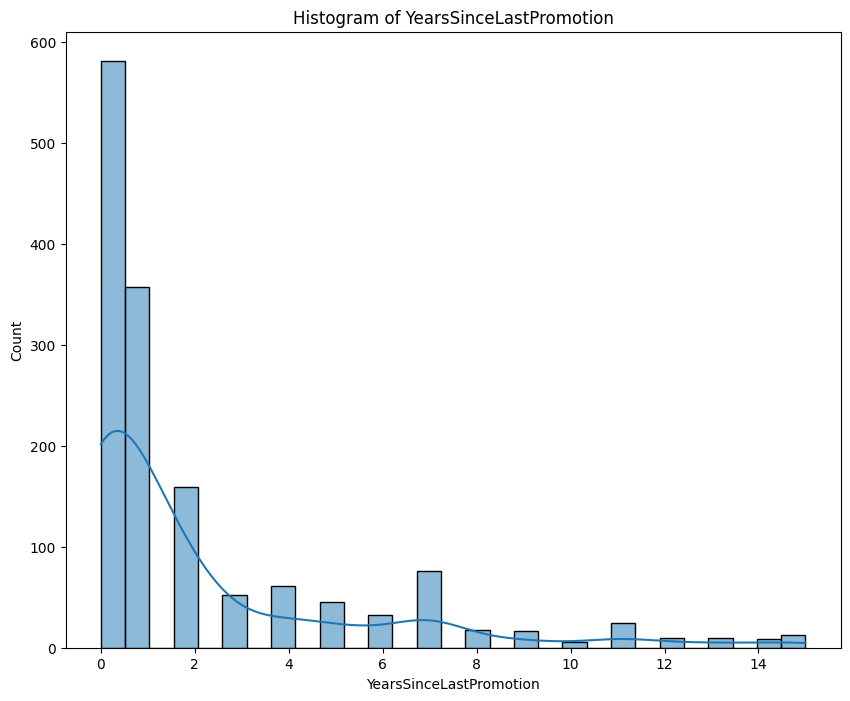

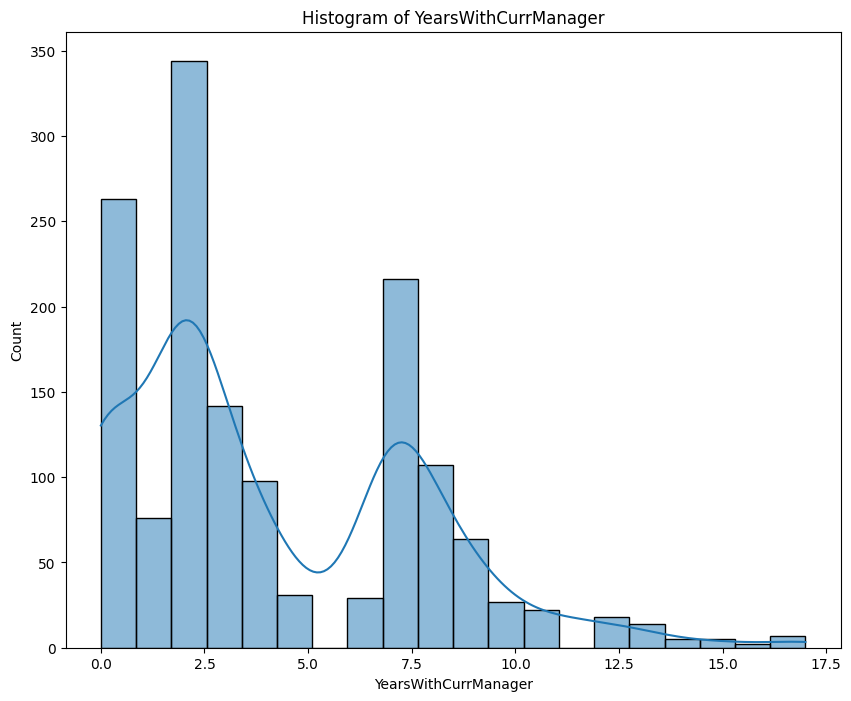

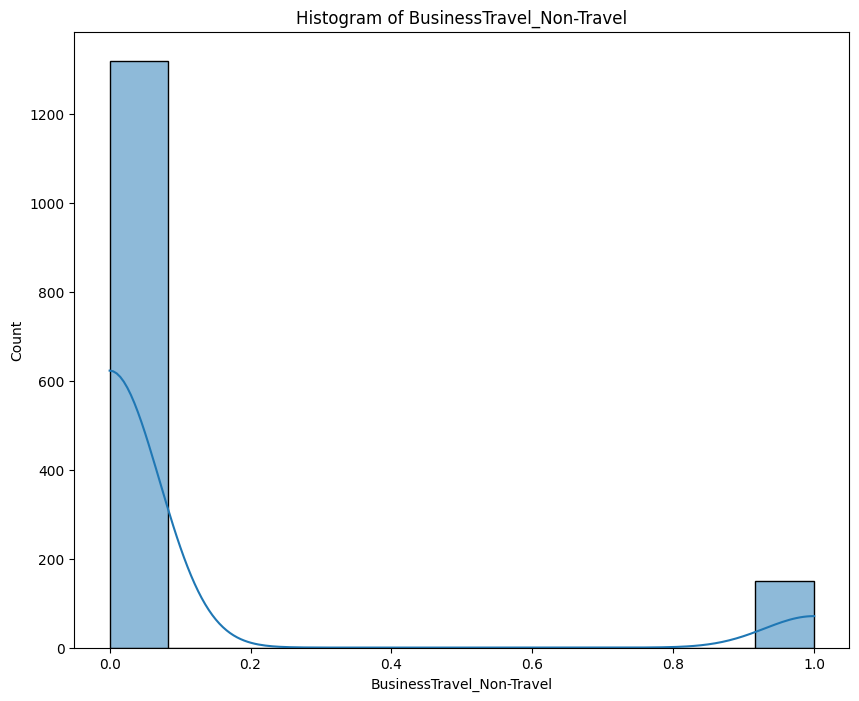

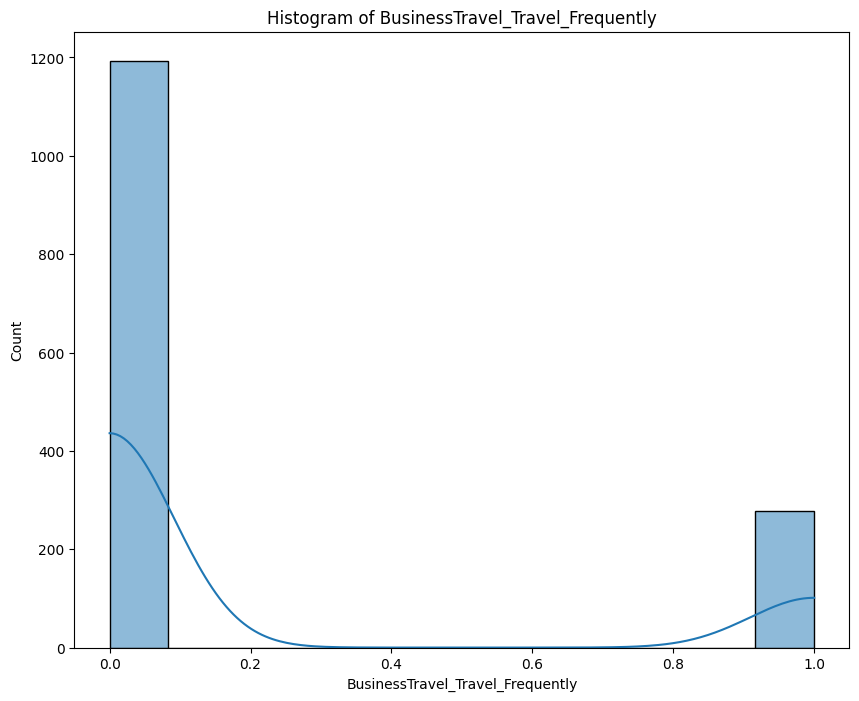

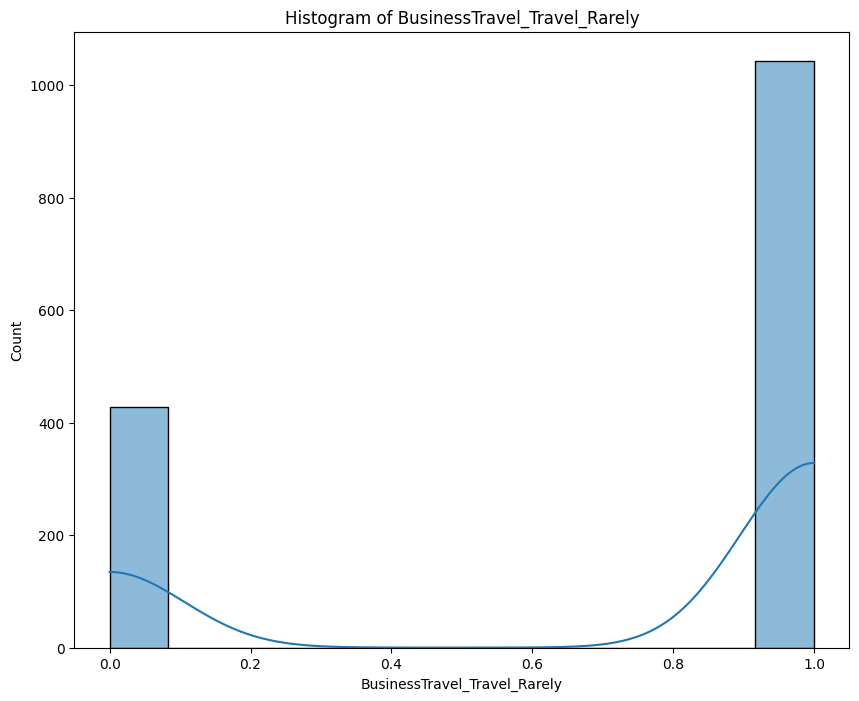

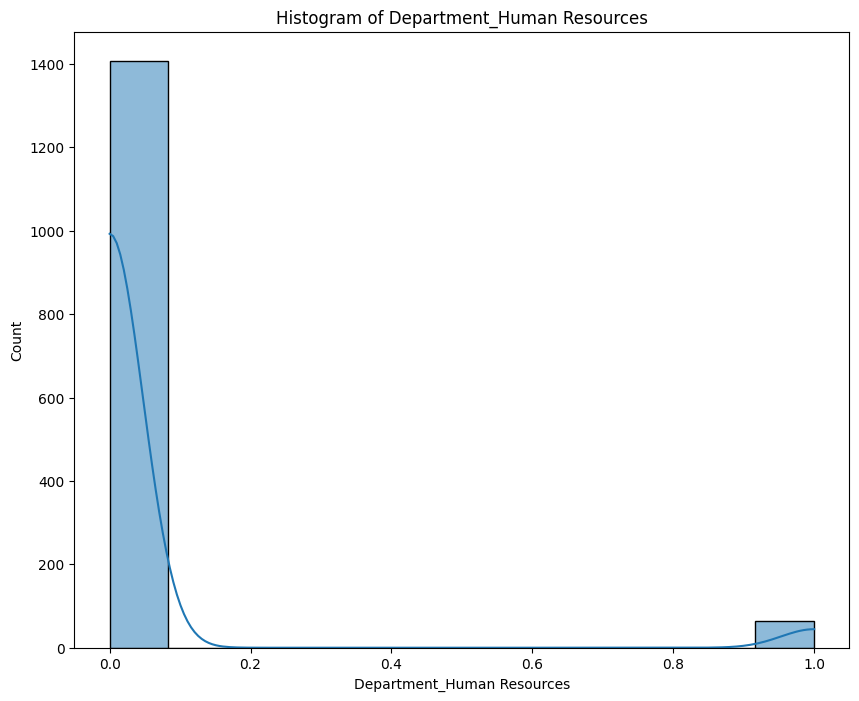

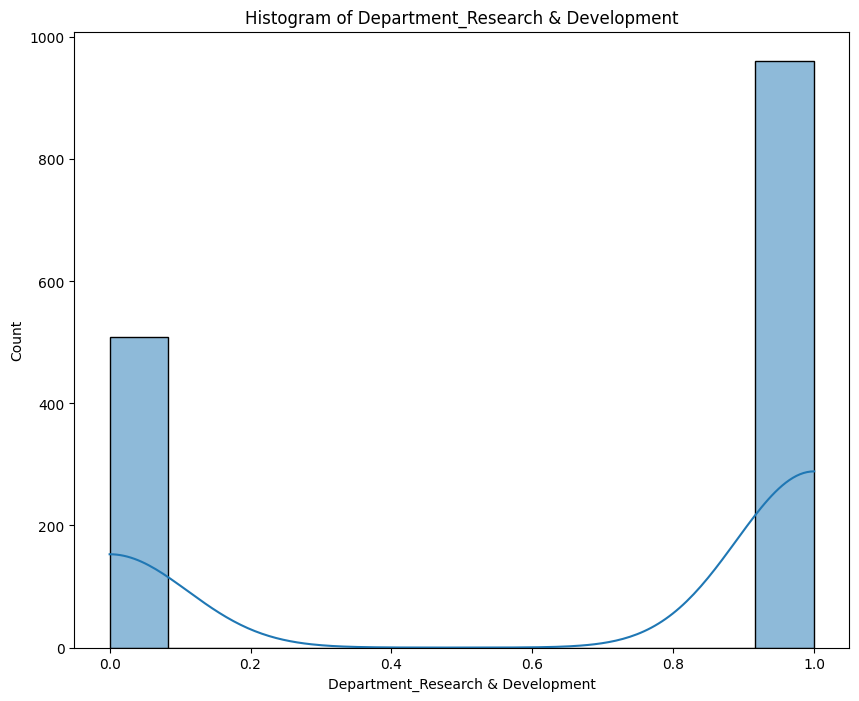

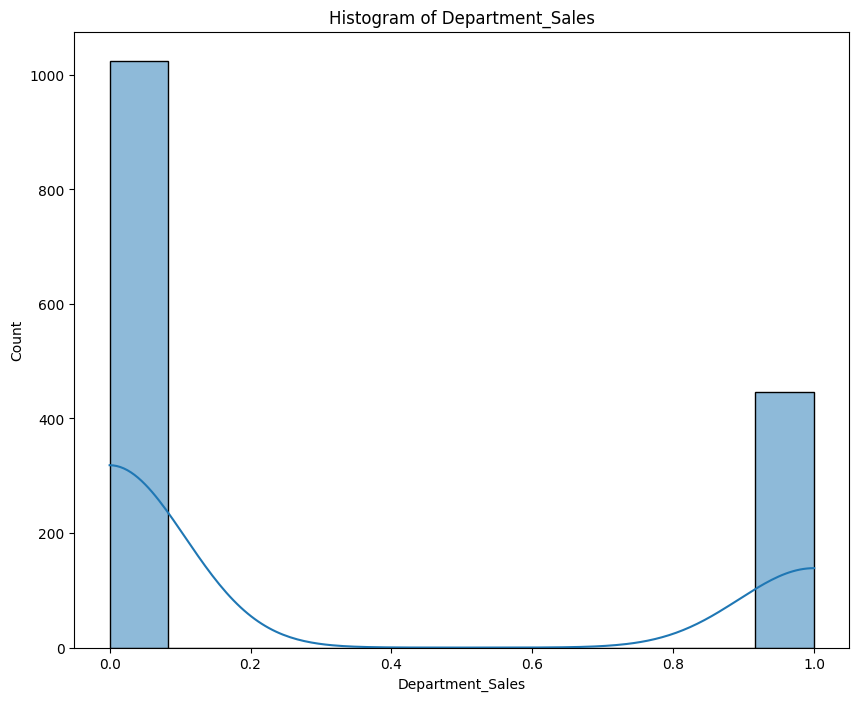

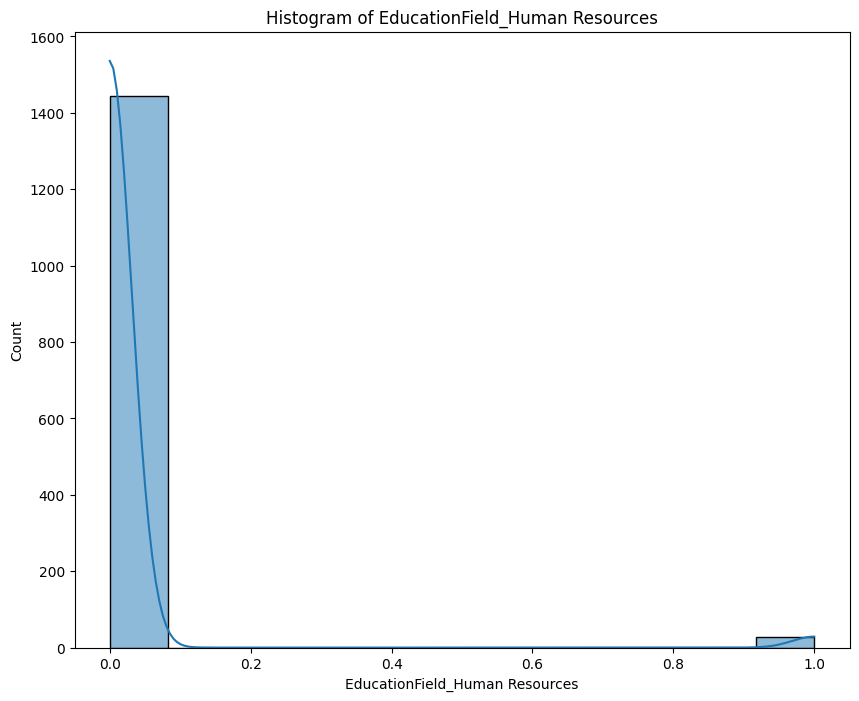

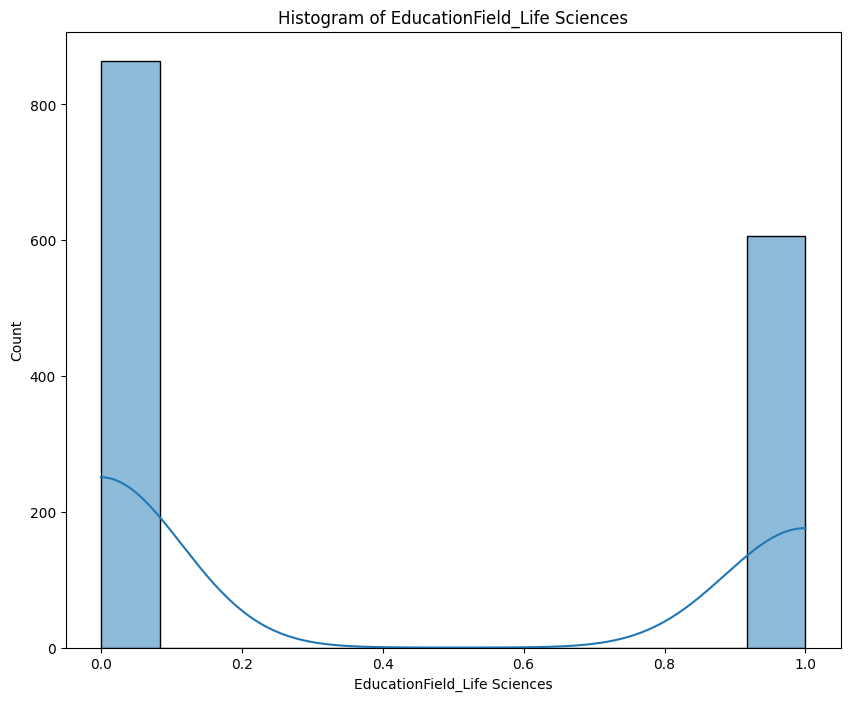

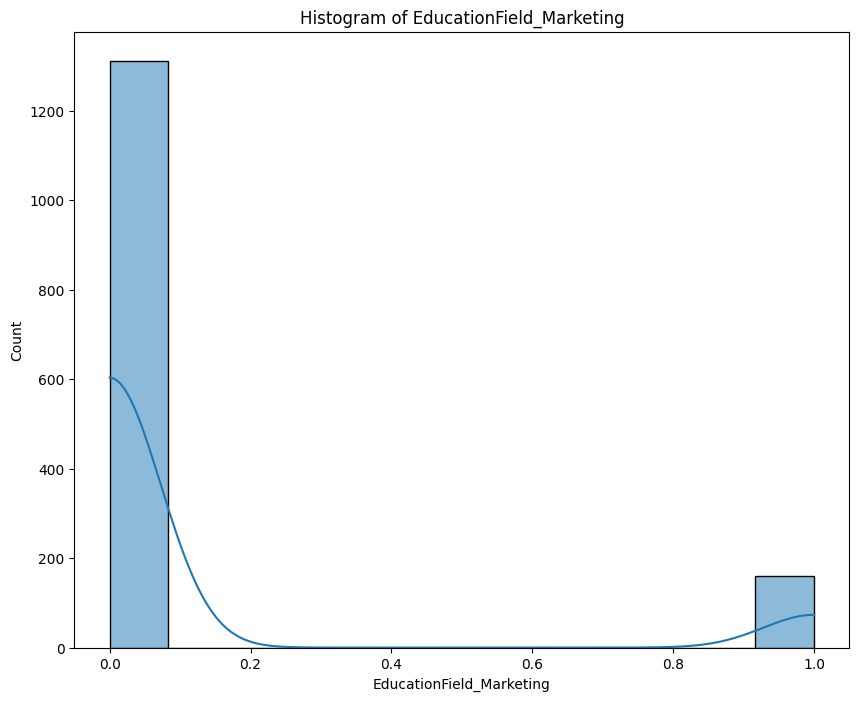

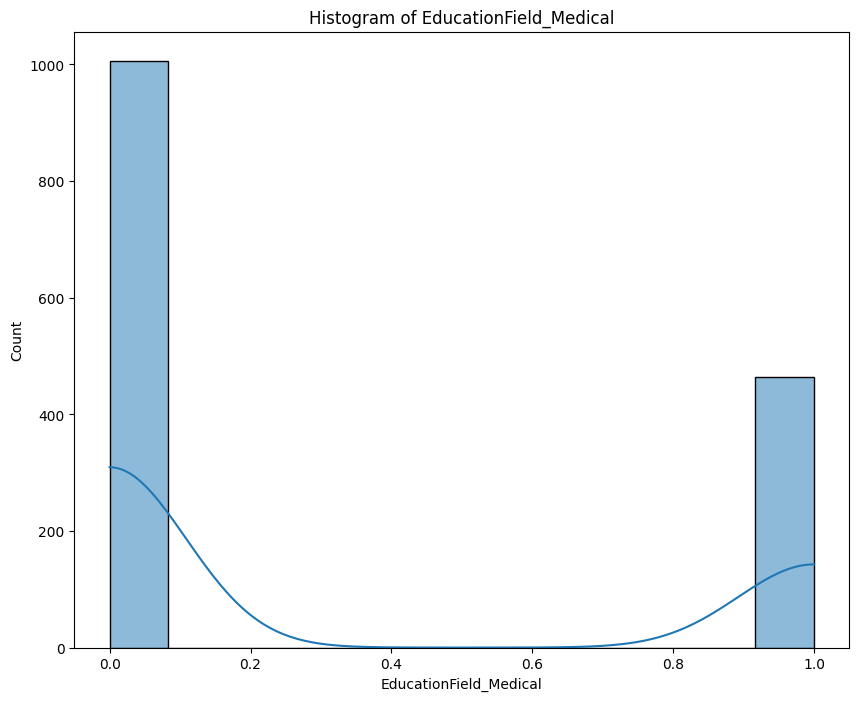

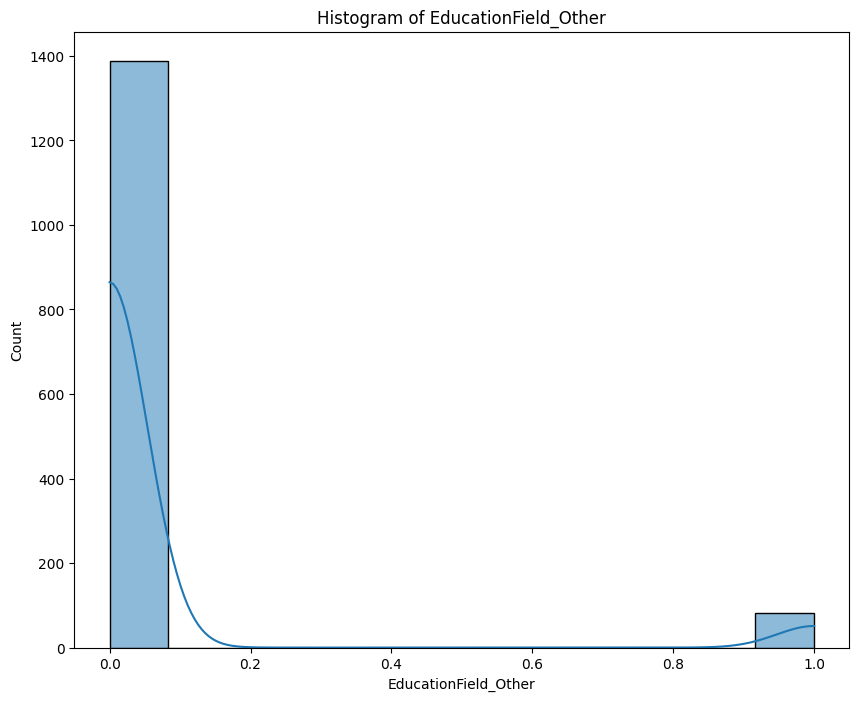

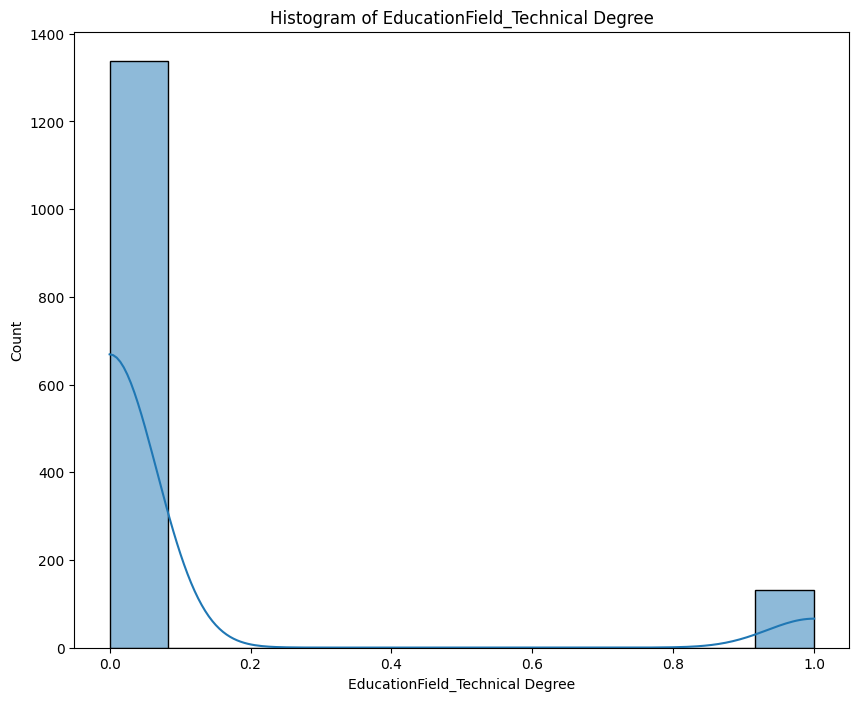

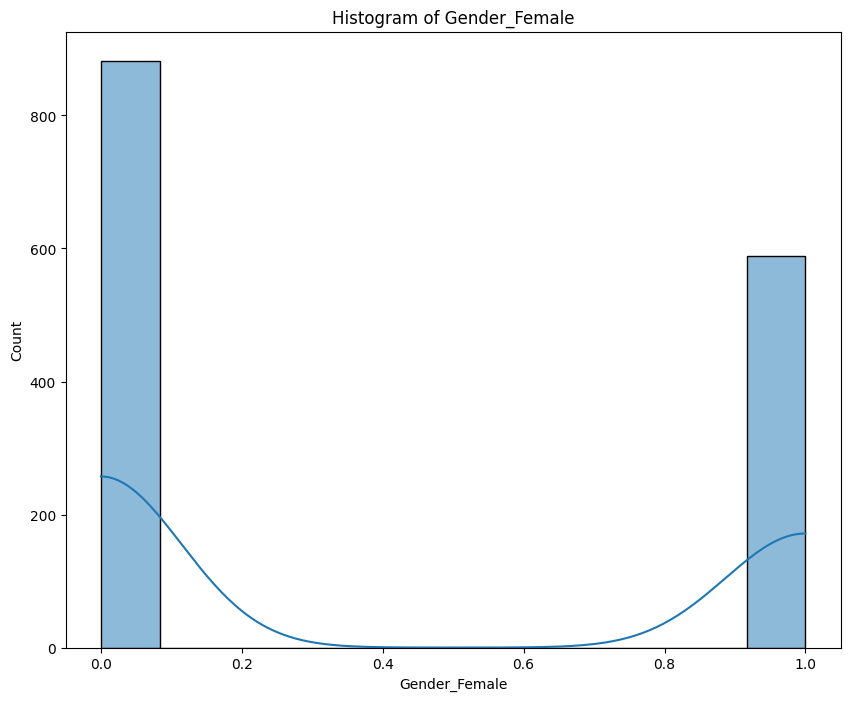

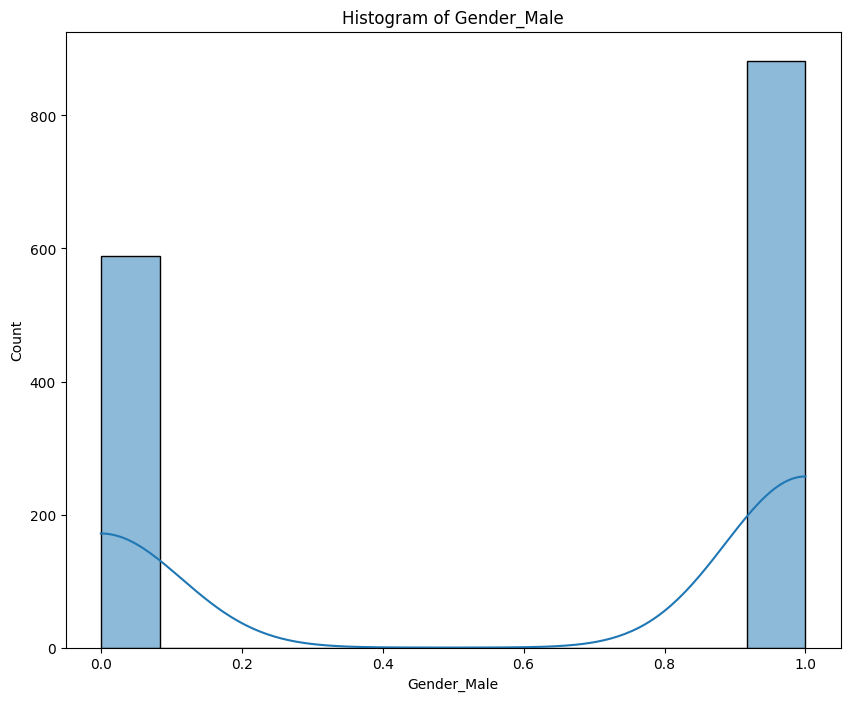

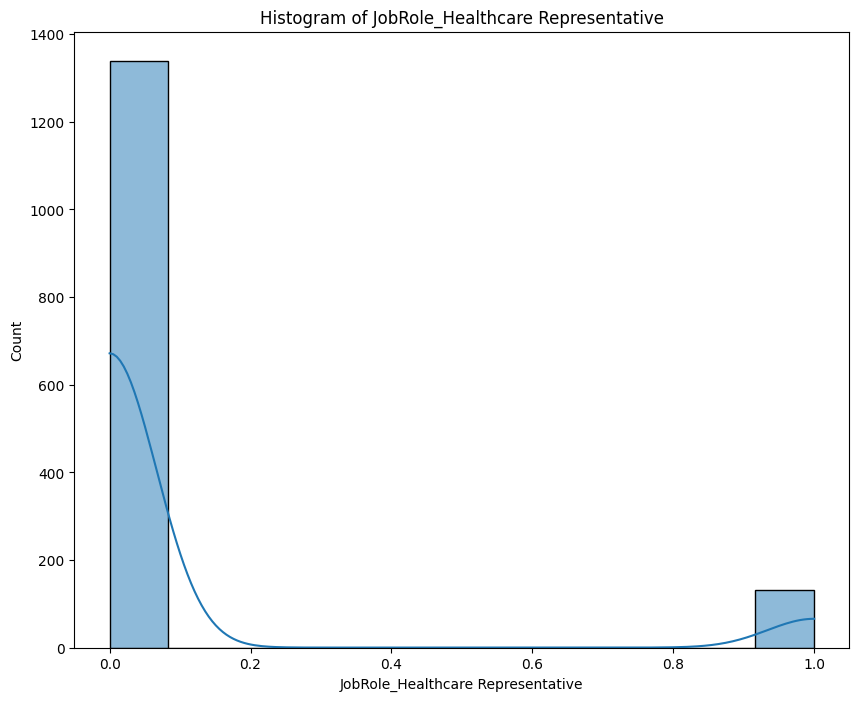

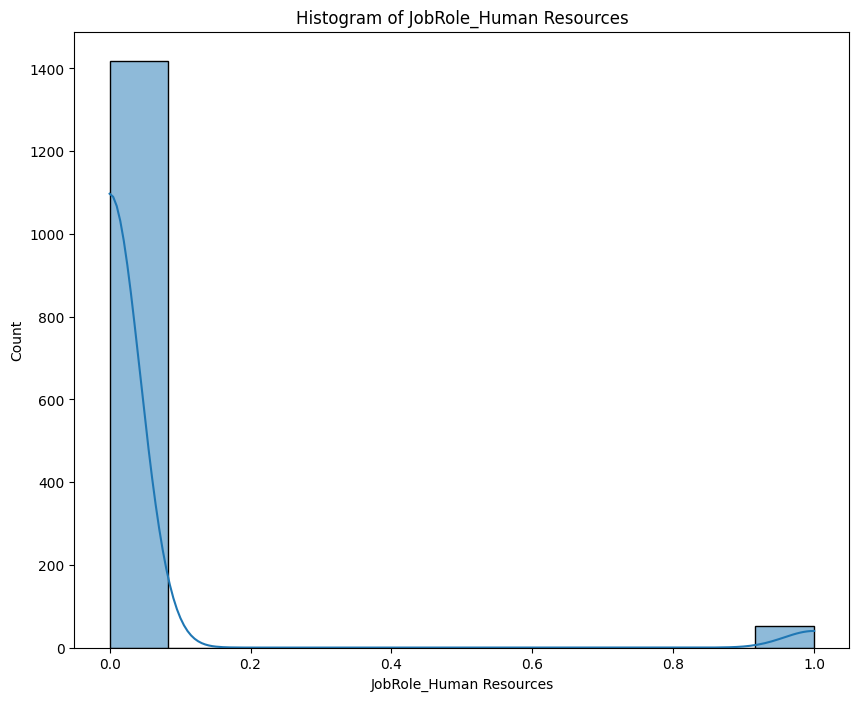

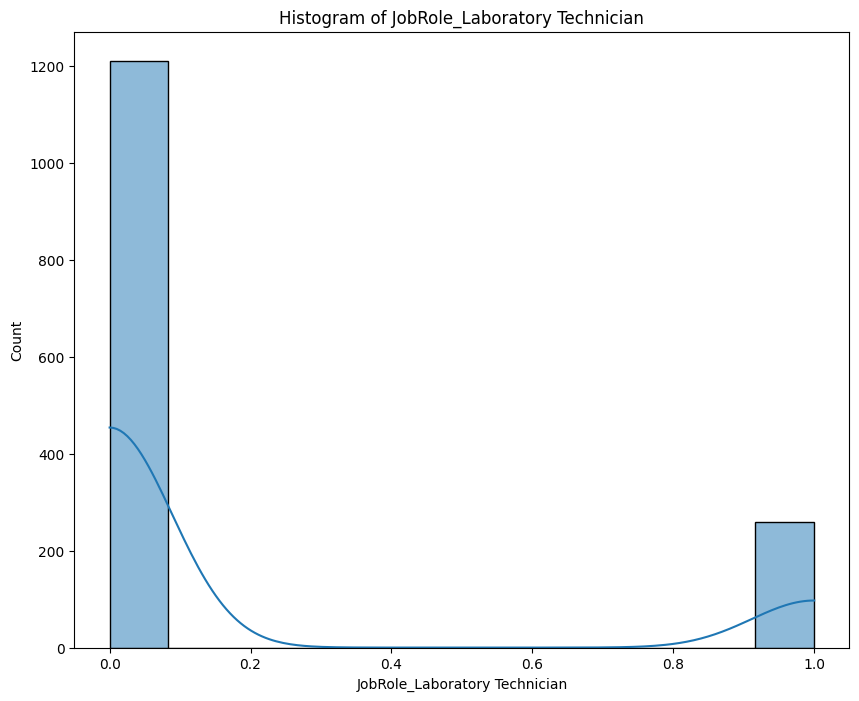

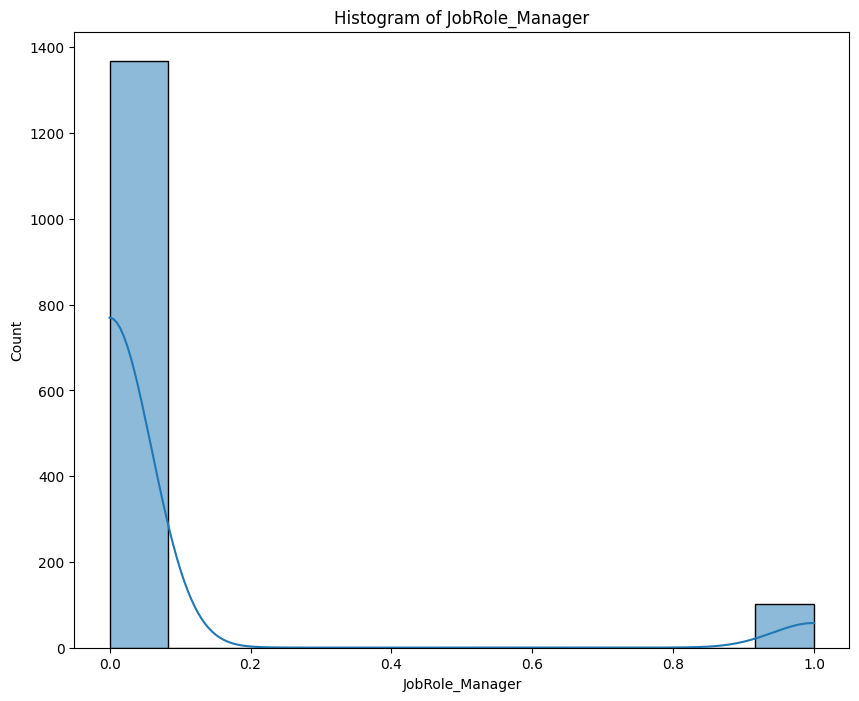

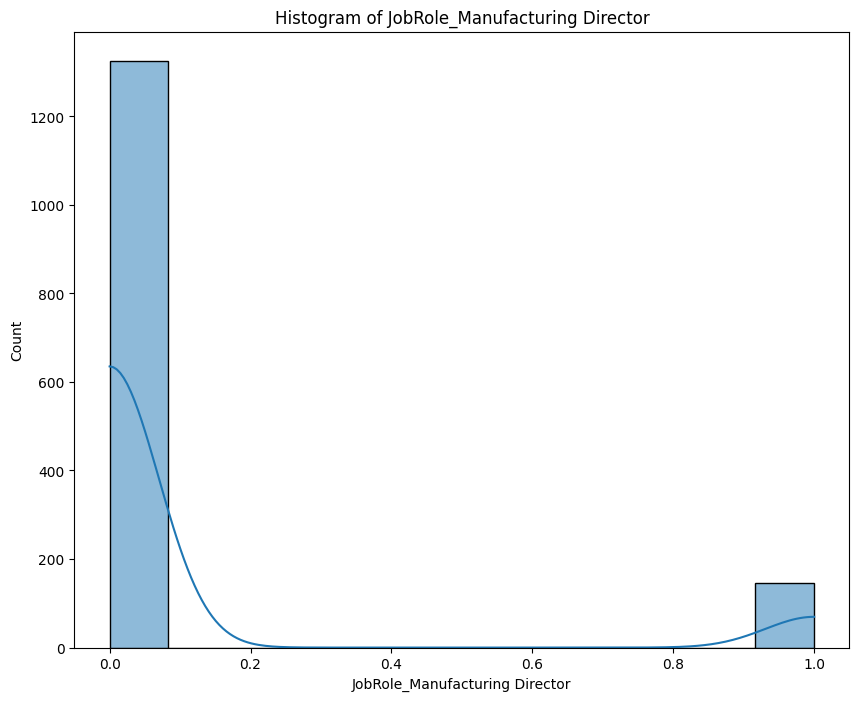

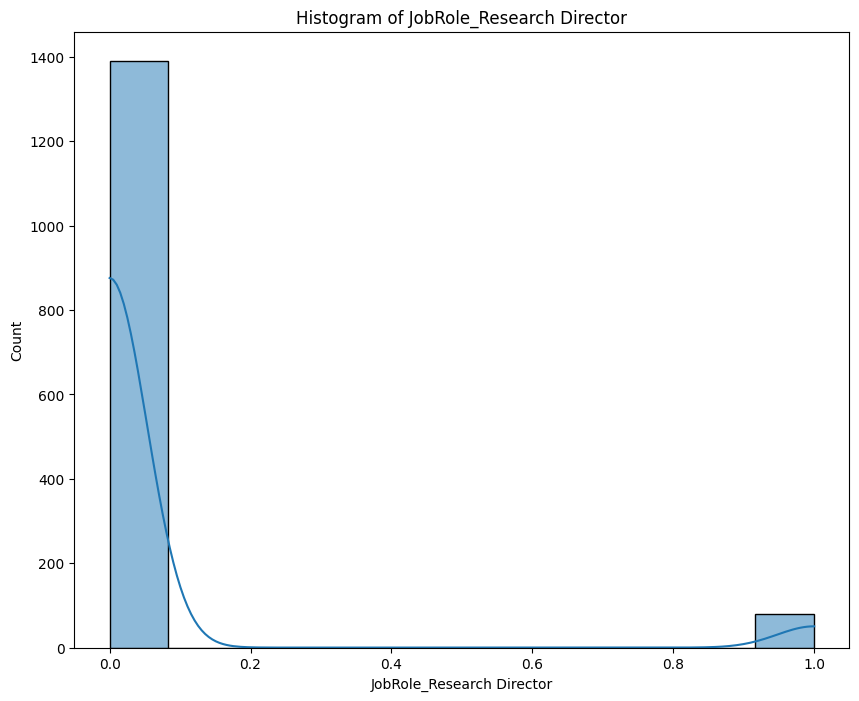

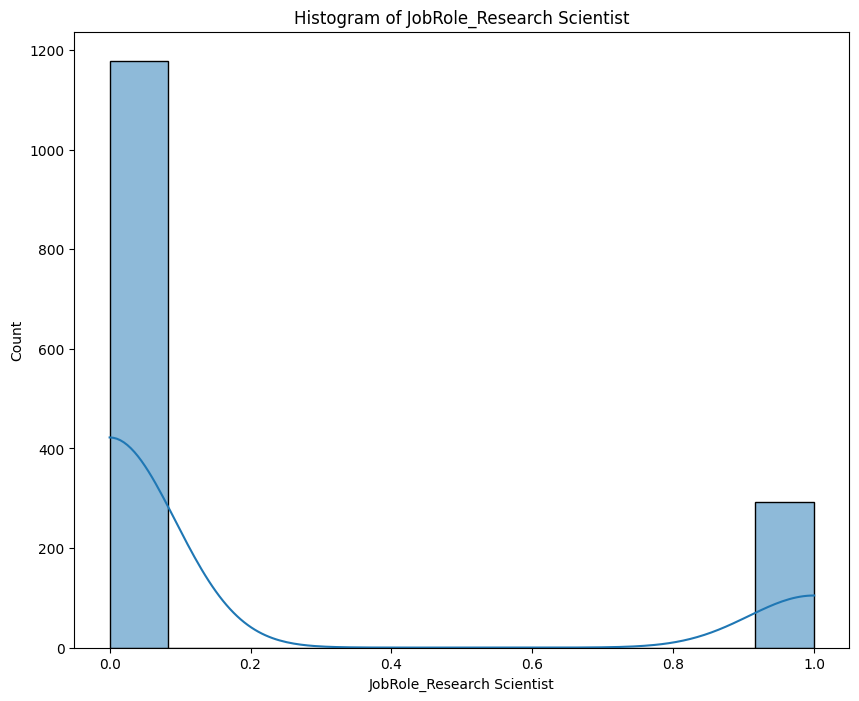

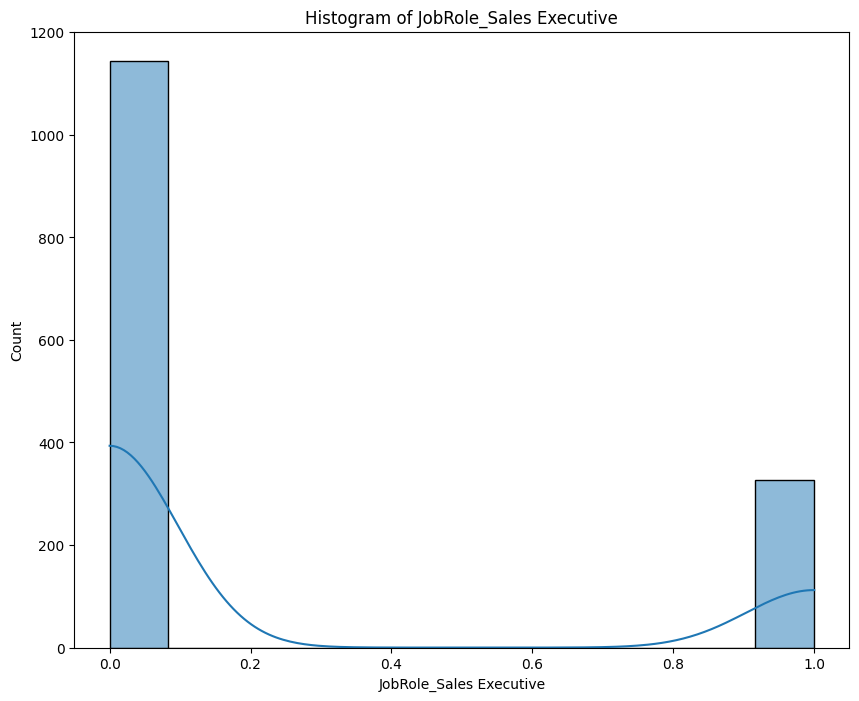

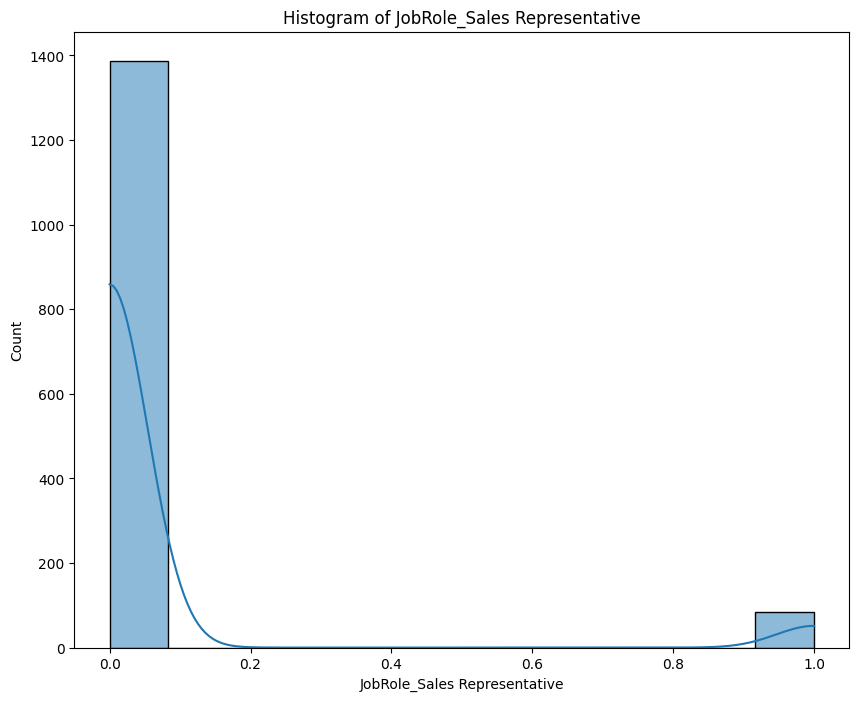

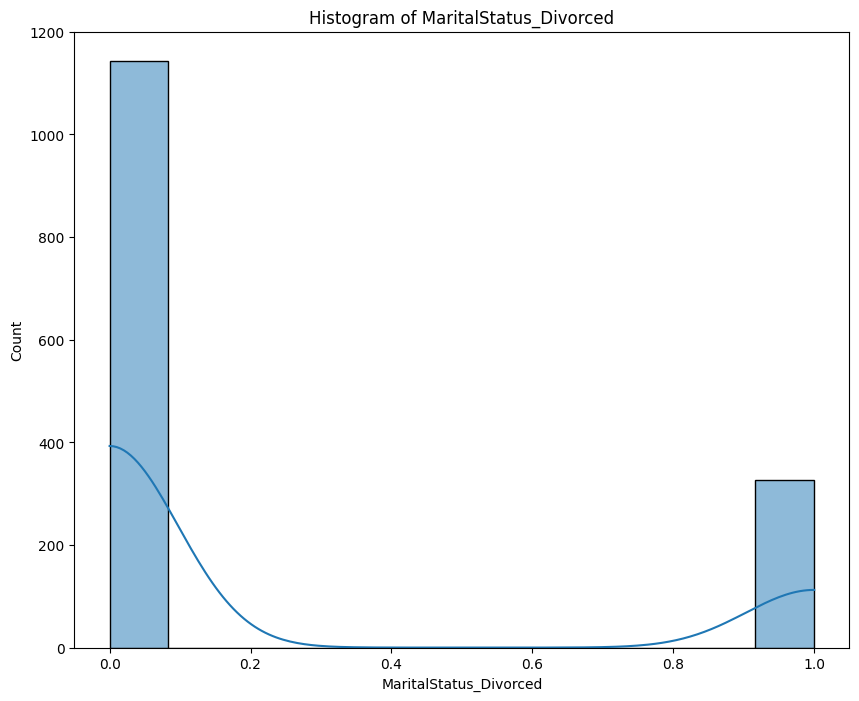

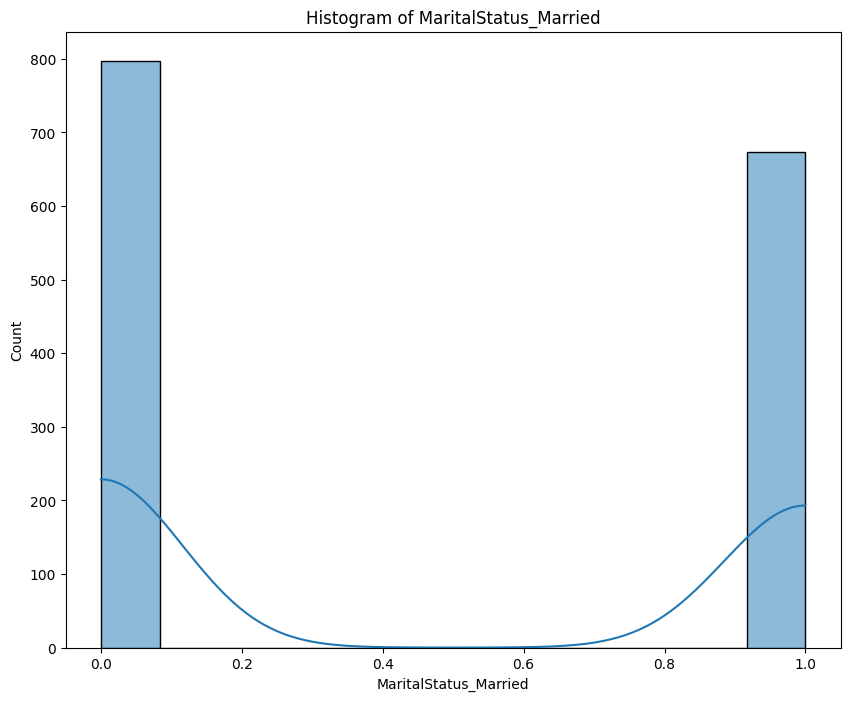

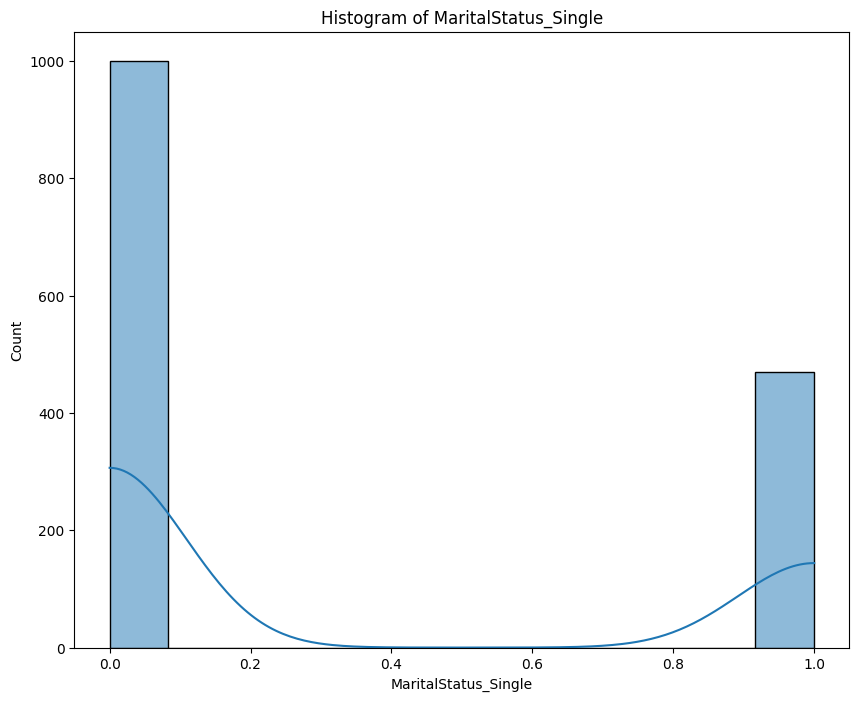

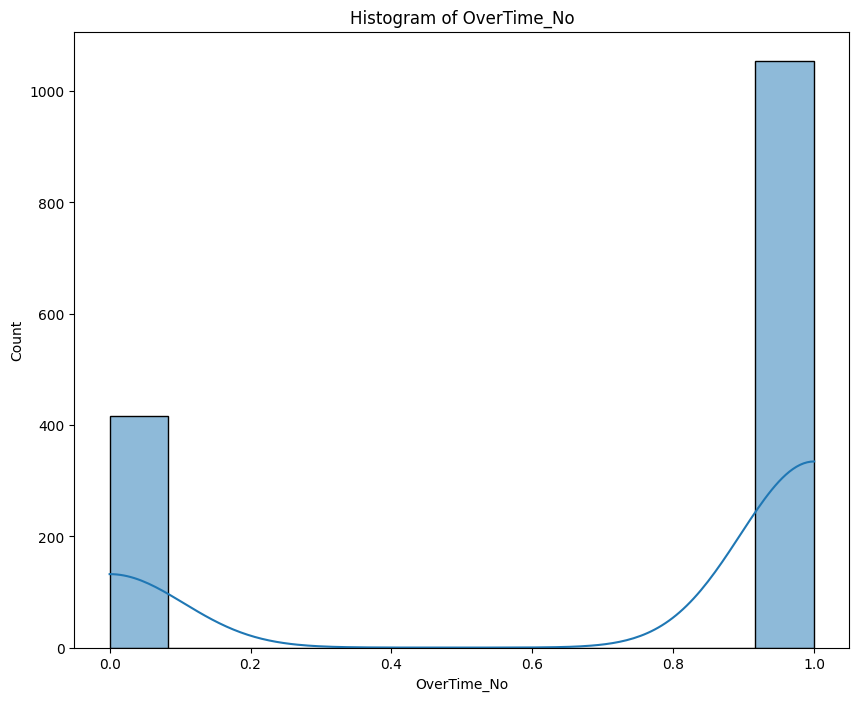

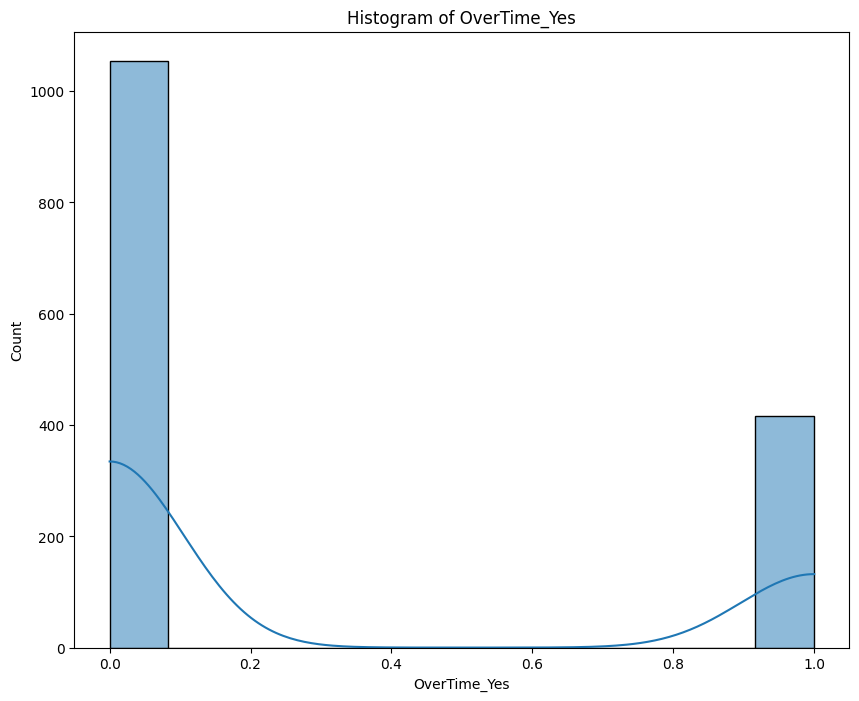

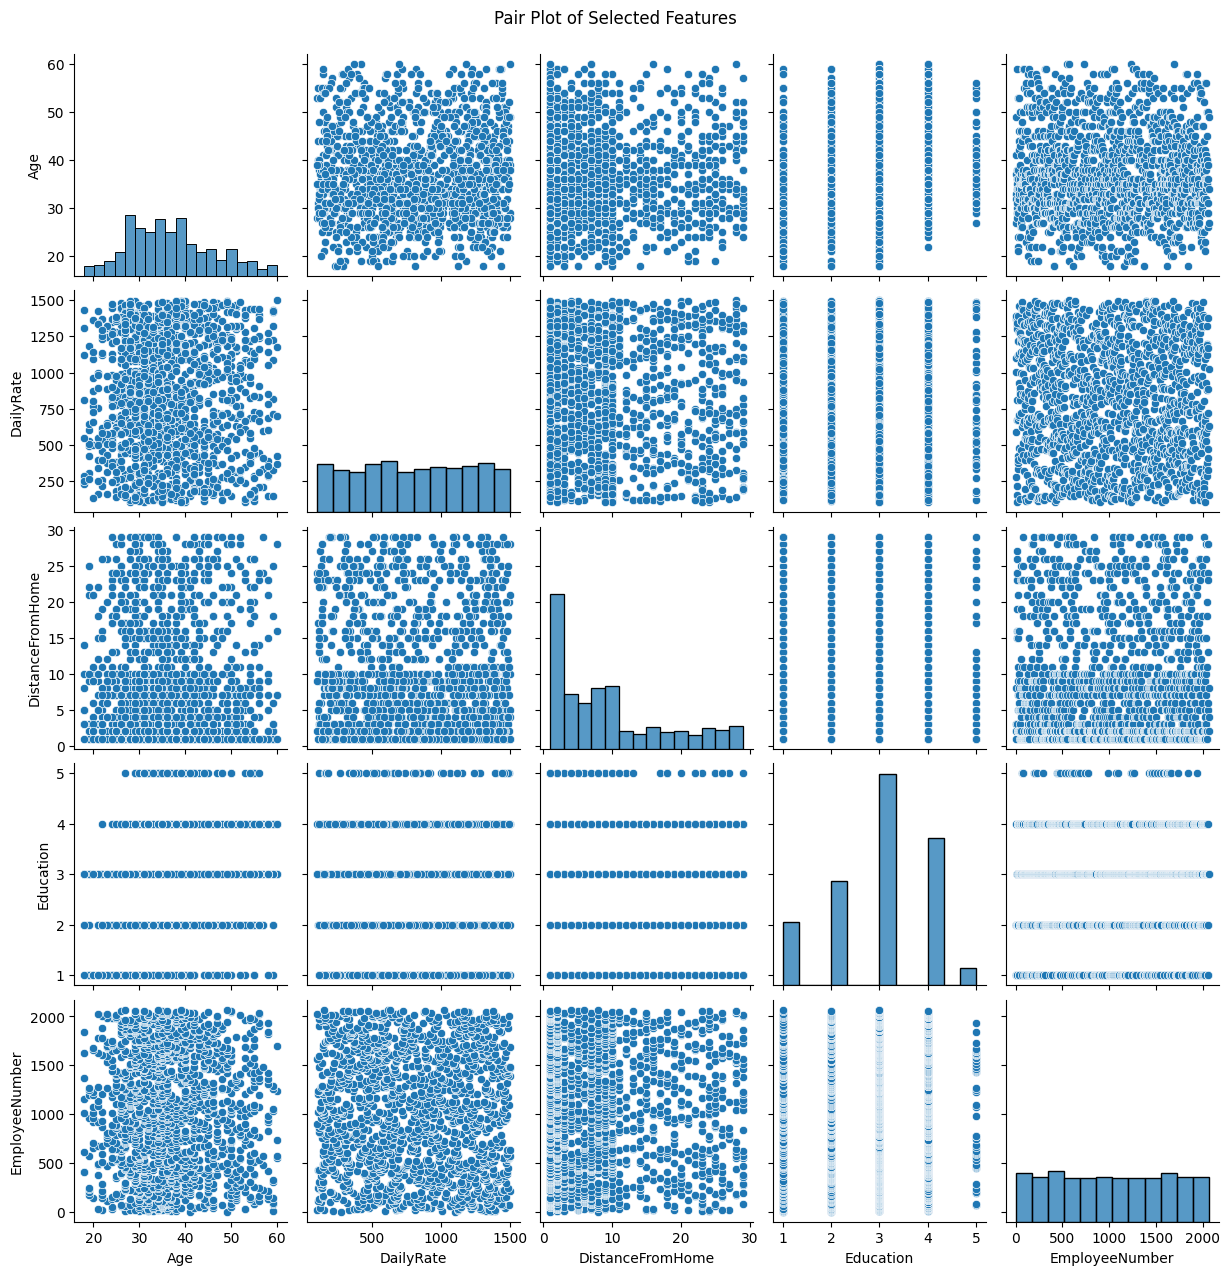

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop columns that are not useful for analysis
columns_to_drop = ["EmployeeCount", "Over18", "StandardHours"]
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns_to_drop, axis=1, inplace=True)

# Encode the binary categorical column 'OverTime'
if 'OverTime' in df.columns:
    df['OverTime'] = df['OverTime'].astype('category').cat.codes

# List of categorical columns we intend to one-hot encode
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Check which categorical columns are present in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Perform One-Hot Encoding
df = pd.get_dummies(df, columns=existing_categorical_columns)

# Data Labeling
# Separate features and labels
X = df  # Since we dropped 'Attrition', all remaining columns are features

# Identify numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Plot histograms for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Plot pair plots for a subset of features (to avoid overcrowding)
pair_plot_features = numerical_features[:5]  # Select the first 5 numerical features for the pair plot
sns.pairplot(df[pair_plot_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()



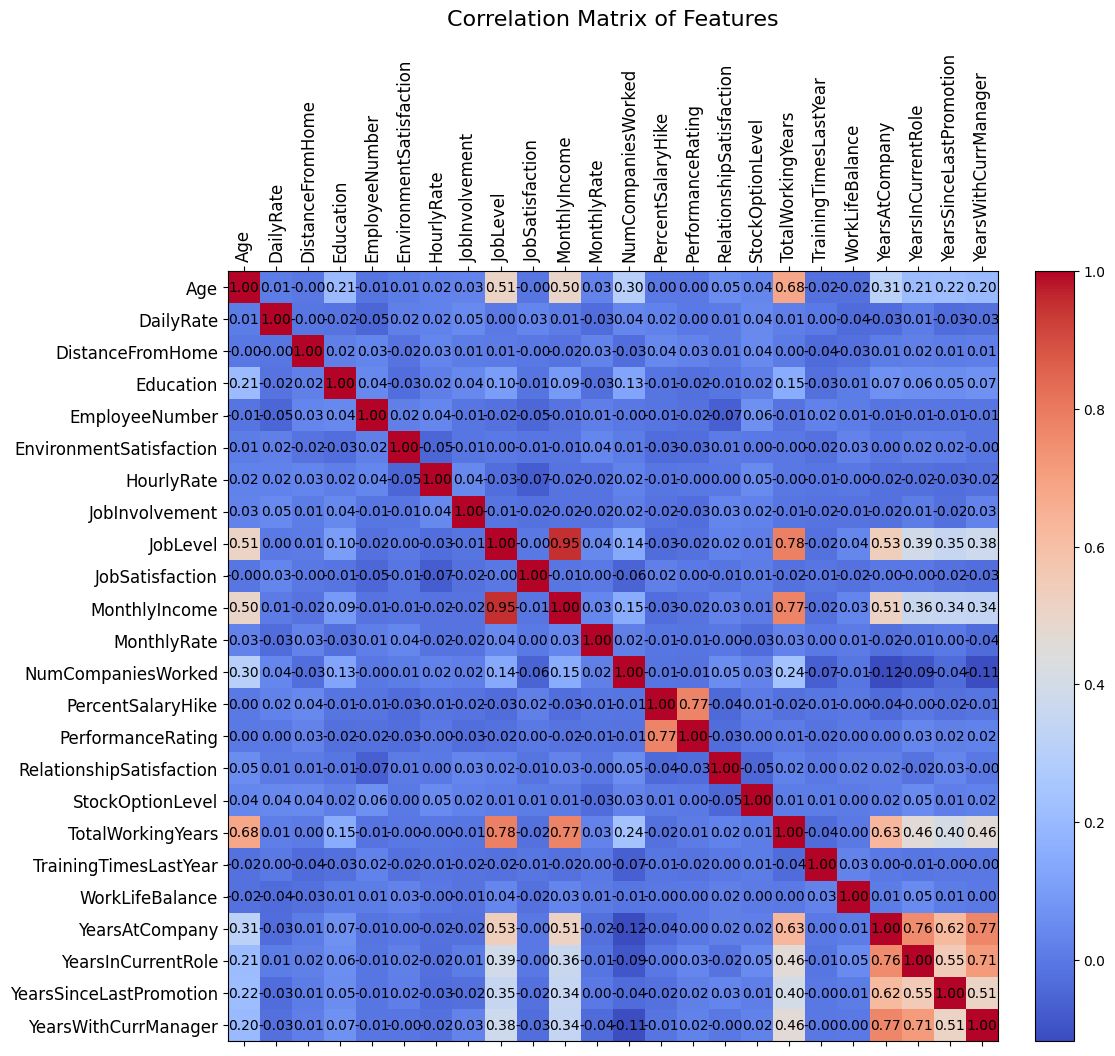

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame named df
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Drop columns 'EmployeeCount' and 'StandardHours' if they exist
columns_to_drop = ['EmployeeCount', 'StandardHours']
df = df.drop(columns_to_drop, axis=1, errors='ignore')

# Drop columns with non-numeric data types
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
df = df.drop(non_numeric_columns, axis=1)

# Handle missing values (replace NaNs with median of each numeric column)
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Create a correlation matrix
correlation_matrix = df.corr()

# Set figure size based on the number of columns
fig, ax = plt.subplots(figsize=(12, 10))

# Displaying the correlation matrix with enhanced visualization using Matplotlib
heatmap = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add color bar
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, fontsize=12)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=12)

# Annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Matrix of Features', fontsize=16, pad=20)
plt.show()



Shape of training set: (1176, 55)
Shape of testing set: (294, 55)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy: 0.8571
Confusion Matrix:
[[248   7]
 [ 35   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.36      0.10      0.16        39

    accuracy                           0.86       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.81      0.86      0.82       294


Decision Tree
Accuracy: 0.7857
Confusion Matrix:
[[221  34]
 [ 29  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       255
           1       0.23      0.26      0.24        39

    accuracy                           0.79       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.79      0.79       294


Random Forest
Accuracy: 0.8776
Confusion Matrix:
[[252   3]
 [ 33   6]]
Classification Report:
              precision    recall  f1-score   suppor

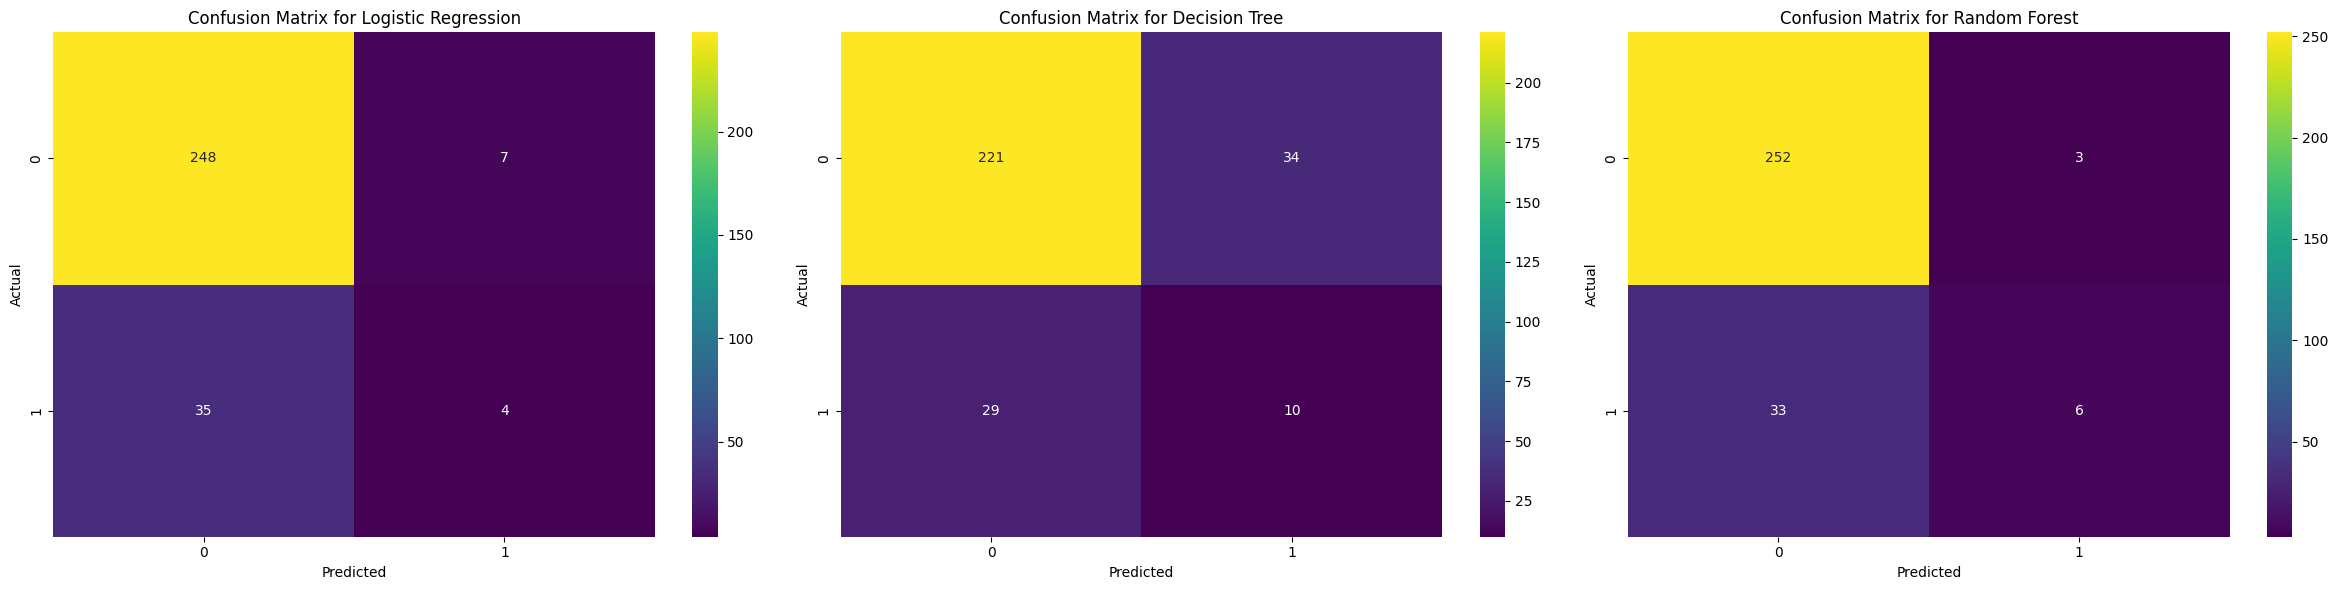

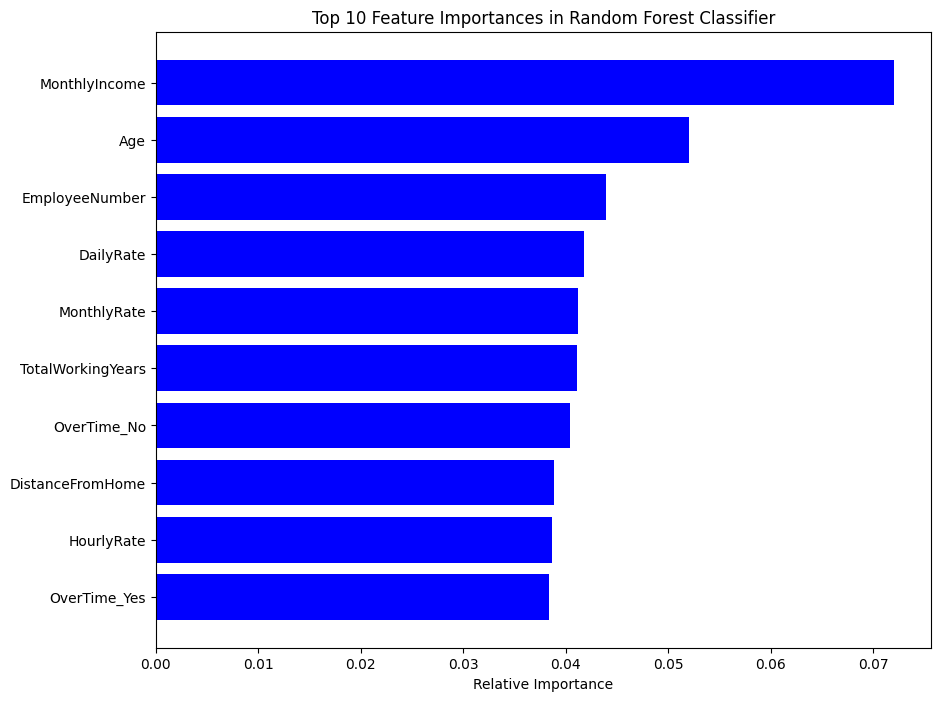

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Convert 'Attrition' to binary values: 'Yes' -> 1, 'No' -> 0
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encoding of categorical variables
df = pd.get_dummies(df)

# Splitting the data into training and testing sets
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(f"\nShape of training set: {X_train.shape}")
print(f"Shape of testing set: {X_test.shape}")

# Logistic Regression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)
lg_predictions = lg.predict(X_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Accuracy and Classification Reports
classifiers = [
    ('Logistic Regression', lg, lg_predictions),
    ('Decision Tree', dt, dt_predictions),
    ('Random Forest', rf, rf_predictions)
]

for name, clf, predictions in classifiers:
    print(f"\n{name}")
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    confmat = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(confmat)
    print("Classification Report:")
    print(classification_report(y_test, predictions))

# Plotting the confusion matrices using Matplotlib and Seaborn
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

for ax, (name, clf, predictions) in zip(axes, classifiers):
    confmat = confusion_matrix(y_test, predictions)
    sns.heatmap(confmat, annot=True, fmt='d', cmap='viridis', ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plotting feature importances for Random Forest Classifier
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 8))
plt.title('Top 10 Feature Importances in Random Forest Classifier')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()